In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
#definisikan nama kolom dataframe
name_list=['Class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
           'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
           'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
           'veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [3]:
#import dataset
train=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data",names=name_list)

In [4]:
train.head(5)

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#cek missing value

train.isnull().sum()

Class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

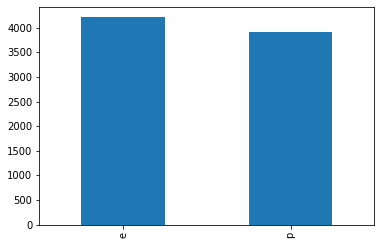

In [6]:
train['Class'].value_counts().sort_index().plot.bar()
plt.show()

In [7]:
#encode dataset
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in train.columns:
    train[col] = labelencoder.fit_transform(train[col])
 

In [8]:
train.head(5)

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


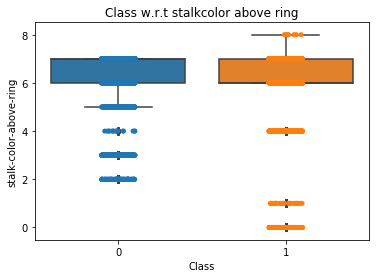

In [9]:
ax = sns.boxplot(x='Class', y='stalk-color-above-ring', 
                data=train)
ax = sns.stripplot(x="Class", y='stalk-color-above-ring',
                   data=train, jitter=True,
                   edgecolor="gray")
plt.title("Class w.r.t stalkcolor above ring",fontsize=12)
plt.show()

In [10]:
features=train.drop("Class",axis=1)
outcomes=train["Class"].values
features.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [11]:
#import dan definisikan train test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
#buat model dengan algoritma random forest
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Random Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Random Forest        100.00 (+/-) 0.00 


In [14]:
#buatmodel random forest
final_model = RandomForestClassifier(n_estimators=100,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1072    0]
 [  15  944]]
99.26144756277697
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1072
           1       1.00      0.98      0.99       959

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [15]:
#final model random forest classifier
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1046   26]
 [   8  951]]
98.3259478089611
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1072
           1       0.97      0.99      0.98       959

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031



In [16]:
final_model = RandomForestClassifier(n_estimators=100,max_features=None,bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1068    4]
 [   8  951]]
99.40915805022156
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1072
           1       1.00      0.99      0.99       959

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [17]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.375)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1072    0]
 [   0  959]]
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [18]:
#buat model dengan XGB Classifier
from xgboost import XGBClassifier


final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=5,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1046   26]
 [   8  951]]
98.3259478089611
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1072
           1       0.97      0.99      0.98       959

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031



In [19]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=2,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)




[[1072    0]
 [   0  959]]
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [20]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout, Input
from keras import optimizers
history=History()

Using TensorFlow backend.
/home/brgx21guns/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/brgx21guns/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/brgx21guns/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/brgx21guns/.local/lib/python3.6/site-packages/t

In [21]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

W0804 23:07:35.295517 140680406255424 deprecation_wrapper.py:119] From /home/brgx21guns/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 23:07:35.351344 140680406255424 deprecation_wrapper.py:119] From /home/brgx21guns/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 23:07:35.356802 140680406255424 deprecation_wrapper.py:119] From /home/brgx21guns/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 23:07:35.417606 140680406255424 deprecation_wrapper.py:119] From /home/brgx21guns/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.place

In [22]:
hist=m.fit(
    # lakukan training pada dataset
    X_train.values, 
    # target class one hot encoding
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    epochs=200, 
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
W0804 23:07:36.651624 140680406255424 deprecation.py:323] From /home/brgx21guns/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5483 samples, validate on 610 samples
Epoch 1/200
 - 2s - loss: 0.7749 - acc: 0.5194 - val_loss: 0.6729 - val_acc: 0.5016

Epoch 00001: val_loss improved from inf to 0.67293, saving model to best.model
Epoch 2/200
 - 0s - loss: 0.7057 - acc: 0.5568 - val_loss: 0.6090 - val_acc: 0.8049

Epoch 00002: val_loss improved from 0.67293 to 0.60895, saving model to best.model
Epoch 3/200
 - 0s - loss: 0.6186 - acc: 0.6595 - val_loss: 0.4987 - val_acc: 0.8131

Epoch 00003: val_loss improved from 0.60895 to 0.49870, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.5128 - acc: 0.7673 - val_loss: 0.4109 - val_acc: 0.8459

Epoch 00004: val_loss improved from 0.49870 to 0.41089, saving model to best.model
Epoch 5/200
 - 0s - loss: 0.4333 - acc: 0.8171 - val_loss: 0.3635 - val_acc: 0.8705

Epoch 00005: val_loss improved from 0.41089 to 0.36355, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.4071 - acc: 0.8377 - val_loss: 0.3261 - val_acc: 0.8787

Epoch 00006: val_loss improved f

 - 0s - loss: 0.0862 - acc: 0.9677 - val_loss: 0.0468 - val_acc: 0.9852

Epoch 00050: val_loss improved from 0.04794 to 0.04684, saving model to best.model
Epoch 51/200
 - 0s - loss: 0.0801 - acc: 0.9686 - val_loss: 0.0392 - val_acc: 0.9852

Epoch 00051: val_loss improved from 0.04684 to 0.03924, saving model to best.model
Epoch 52/200
 - 0s - loss: 0.0822 - acc: 0.9695 - val_loss: 0.0358 - val_acc: 0.9869

Epoch 00052: val_loss improved from 0.03924 to 0.03576, saving model to best.model
Epoch 53/200
 - 0s - loss: 0.0792 - acc: 0.9688 - val_loss: 0.0392 - val_acc: 0.9852

Epoch 00053: val_loss did not improve from 0.03576
Epoch 54/200
 - 0s - loss: 0.0779 - acc: 0.9706 - val_loss: 0.0330 - val_acc: 0.9869

Epoch 00054: val_loss improved from 0.03576 to 0.03303, saving model to best.model
Epoch 55/200
 - 0s - loss: 0.0811 - acc: 0.9710 - val_loss: 0.0339 - val_acc: 0.9852

Epoch 00055: val_loss did not improve from 0.03303
Epoch 56/200
 - 0s - loss: 0.0716 - acc: 0.9717 - val_loss: 0.0

 - 0s - loss: 0.0328 - acc: 0.9883 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 00104: val_loss improved from 0.00717 to 0.00638, saving model to best.model
Epoch 105/200
 - 0s - loss: 0.0289 - acc: 0.9896 - val_loss: 0.0064 - val_acc: 0.9984

Epoch 00105: val_loss did not improve from 0.00638
Epoch 106/200
 - 0s - loss: 0.0264 - acc: 0.9894 - val_loss: 0.0067 - val_acc: 0.9984

Epoch 00106: val_loss did not improve from 0.00638
Epoch 107/200
 - 0s - loss: 0.0274 - acc: 0.9900 - val_loss: 0.0063 - val_acc: 0.9984

Epoch 00107: val_loss improved from 0.00638 to 0.00627, saving model to best.model
Epoch 108/200
 - 0s - loss: 0.0337 - acc: 0.9869 - val_loss: 0.0067 - val_acc: 0.9967

Epoch 00108: val_loss did not improve from 0.00627
Epoch 109/200
 - 0s - loss: 0.0288 - acc: 0.9891 - val_loss: 0.0076 - val_acc: 0.9967

Epoch 00109: val_loss did not improve from 0.00627
Epoch 110/200
 - 0s - loss: 0.0282 - acc: 0.9889 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 00110: val_loss improved from


Epoch 00158: val_loss did not improve from 0.00247
Epoch 159/200
 - 0s - loss: 0.0147 - acc: 0.9940 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 00159: val_loss did not improve from 0.00247
Epoch 160/200
 - 0s - loss: 0.0176 - acc: 0.9934 - val_loss: 0.0024 - val_acc: 1.0000

Epoch 00160: val_loss improved from 0.00247 to 0.00236, saving model to best.model
Epoch 161/200
 - 0s - loss: 0.0184 - acc: 0.9945 - val_loss: 0.0025 - val_acc: 1.0000

Epoch 00161: val_loss did not improve from 0.00236
Epoch 162/200
 - 0s - loss: 0.0200 - acc: 0.9927 - val_loss: 0.0026 - val_acc: 1.0000

Epoch 00162: val_loss did not improve from 0.00236
Epoch 163/200
 - 0s - loss: 0.0146 - acc: 0.9942 - val_loss: 0.0024 - val_acc: 1.0000

Epoch 00163: val_loss did not improve from 0.00236
Epoch 164/200
 - 0s - loss: 0.0118 - acc: 0.9947 - val_loss: 0.0022 - val_acc: 1.0000

Epoch 00164: val_loss improved from 0.00236 to 0.00220, saving model to best.model
Epoch 165/200
 - 0s - loss: 0.0170 - acc: 0.9936 - val_l

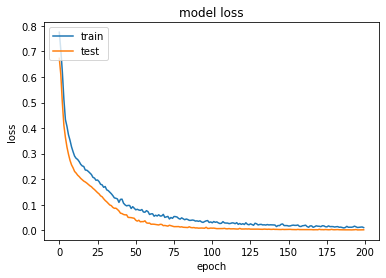

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
m.load_weights("best.model")

In [25]:
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[1072    0]
 [   0  959]]
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [27]:
train.columns

Index(['Class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11 = Input(shape=(1,))
input_12 = Input(shape=(1,))
input_13 = Input(shape=(1,))
input_14= Input(shape=(1,))
input_15 = Input(shape=(1,))
input_16 = Input(shape=(1,))
input_17 = Input(shape=(1,))
input_18 = Input(shape=(1,))
input_19 = Input(shape=(1,))
input_20= Input(shape=(1,))
input_21= Input(shape=(1,))
input_22 = Input(shape=(1,))





hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11= Dense(32, activation='sigmoid')(input_11)
hidden_12 = Dense(32, activation='sigmoid')(input_12)
hidden_13= Dense(32, activation='sigmoid')(input_13)
hidden_14= Dense(32, activation='sigmoid')(input_14)
hidden_15= Dense(32, activation='sigmoid')(input_15)
hidden_16= Dense(32, activation='sigmoid')(input_16)
hidden_17= Dense(32, activation='sigmoid')(input_17)
hidden_18= Dense(32, activation='sigmoid')(input_18)
hidden_19= Dense(32, activation='sigmoid')(input_19)
hidden_20= Dense(32, activation='sigmoid')(input_20)
hidden_21= Dense(32, activation='sigmoid')(input_21)
hidden_22= Dense(32, activation='sigmoid')(input_22)



value_list=[X_train[['cap-shape']].values,
            X_train[['cap-surface']].values,
            X_train[['cap-color']].values,
            X_train[['bruises']].values,
            X_train[['odor']].values,
            X_train[['gill-attachment']].values,
            X_train[['gill-spacing']].values,
            X_train[['gill-size']].values,
            X_train[['gill-color']].values,
            X_train[['stalk-shape']].values,
            X_train[['stalk-root']].values,
            X_train[['stalk-surface-above-ring']].values,
            X_train[['stalk-surface-below-ring']].values,
            X_train[['stalk-color-above-ring']].values,
            X_train[['stalk-color-below-ring']].values,
            X_train[['ring-number']].values,
            X_train[['ring-type']].values,
            X_train[['spore-print-color']].values,
            X_train[['population']].values,
            X_train[['habitat']].values,
            X_train[['veil-type']].values,
            X_train[['veil-color']].values,
           ]

value_list_test=[X_test[['cap-shape']].values,
            X_test[['cap-surface']].values,
            X_test[['cap-color']].values,
            X_test[['bruises']].values,
            X_test[['odor']].values,
            X_test[['gill-attachment']].values,
            X_test[['gill-spacing']].values,
            X_test[['gill-size']].values,
            X_test[['gill-color']].values,
            X_test[['stalk-shape']].values,
            X_test[['stalk-root']].values,
            X_test[['stalk-surface-above-ring']].values,
            X_test[['stalk-surface-below-ring']].values,
            X_test[['stalk-color-above-ring']].values,
            X_test[['stalk-color-below-ring']].values,
            X_test[['ring-number']].values,
            X_test[['ring-type']].values,
            X_test[['spore-print-color']].values,
            X_test[['population']].values,
            X_test[['habitat']].values,
            X_test[['veil-type']].values,
            X_test[['veil-color']].values,
           ]



x = keras.layers.concatenate([hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                             hidden_9,hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,
                             hidden_17,hidden_18,hidden_19,hidden_20,hidden_21,hidden_22])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,
                     input_17,input_18,input_19,input_20,input_21,input_22], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    value_list, 
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    epochs=200, 
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:129: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 5483 samples, validate on 610 samples
Epoch 1/200
 - 5s - loss: 0.6732 - acc: 0.5780 - val_loss: 0.6023 - val_acc: 0.8213

Epoch 00001: val_loss improved from inf to 0.60230, saving model to best.model
Epoch 2/200
 - 0s - loss: 0.5606 - acc: 0.8266 - val_loss: 0.5268 - val_acc: 0.8016

Epoch 00002: val_loss improved from 0.60230 to 0.52681, saving model to best.model
Epoch 3/200
 - 0s - loss: 0.4815 - acc: 0.8379 - val_loss: 0.4560 - val_acc: 0.8410

Epoch 00003: val_loss improved from 0.52681 to 0.45601, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.4268 - acc: 0.8501 - val_loss: 0.4115 - val_acc: 0.8574

Epoch 00004: val_loss improved from 0.45601 to 0.41145, saving model to best.model
Epoch 5/200
 - 0s - loss: 0.3969 - acc: 0.8525 - val_loss: 0.3813 - val_acc: 0.8738

Epoch 00005: val_loss improved from 0.41145 to 0.38129, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.3710 - acc: 0.8663 - val_loss: 0.3673 - val_acc: 0.8721

Epoch 00006: val_loss improved f

Epoch 52/200
 - 0s - loss: 0.1623 - acc: 0.9478 - val_loss: 0.1327 - val_acc: 0.9508

Epoch 00052: val_loss did not improve from 0.13267
Epoch 53/200
 - 0s - loss: 0.1591 - acc: 0.9477 - val_loss: 0.1295 - val_acc: 0.9574

Epoch 00053: val_loss improved from 0.13267 to 0.12951, saving model to best.model
Epoch 54/200
 - 1s - loss: 0.1602 - acc: 0.9495 - val_loss: 0.1295 - val_acc: 0.9525

Epoch 00054: val_loss improved from 0.12951 to 0.12951, saving model to best.model
Epoch 55/200
 - 0s - loss: 0.1580 - acc: 0.9475 - val_loss: 0.1279 - val_acc: 0.9541

Epoch 00055: val_loss improved from 0.12951 to 0.12787, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1580 - acc: 0.9488 - val_loss: 0.1265 - val_acc: 0.9590

Epoch 00056: val_loss improved from 0.12787 to 0.12650, saving model to best.model
Epoch 57/200
 - 0s - loss: 0.1557 - acc: 0.9488 - val_loss: 0.1304 - val_acc: 0.9574

Epoch 00057: val_loss did not improve from 0.12650
Epoch 58/200
 - 0s - loss: 0.1575 - acc: 0.9475 - 

 - 1s - loss: 0.0687 - acc: 0.9761 - val_loss: 0.0538 - val_acc: 0.9869

Epoch 00104: val_loss improved from 0.05444 to 0.05381, saving model to best.model
Epoch 105/200
 - 1s - loss: 0.0657 - acc: 0.9785 - val_loss: 0.0517 - val_acc: 0.9836

Epoch 00105: val_loss improved from 0.05381 to 0.05166, saving model to best.model
Epoch 106/200
 - 1s - loss: 0.0655 - acc: 0.9796 - val_loss: 0.0508 - val_acc: 0.9852

Epoch 00106: val_loss improved from 0.05166 to 0.05078, saving model to best.model
Epoch 107/200
 - 0s - loss: 0.0618 - acc: 0.9790 - val_loss: 0.0496 - val_acc: 0.9902

Epoch 00107: val_loss improved from 0.05078 to 0.04964, saving model to best.model
Epoch 108/200
 - 1s - loss: 0.0631 - acc: 0.9790 - val_loss: 0.0465 - val_acc: 0.9902

Epoch 00108: val_loss improved from 0.04964 to 0.04651, saving model to best.model
Epoch 109/200
 - 0s - loss: 0.0587 - acc: 0.9814 - val_loss: 0.0482 - val_acc: 0.9885

Epoch 00109: val_loss did not improve from 0.04651
Epoch 110/200
 - 0s - loss


Epoch 00156: val_loss improved from 0.01420 to 0.01308, saving model to best.model
Epoch 157/200
 - 0s - loss: 0.0121 - acc: 0.9982 - val_loss: 0.0171 - val_acc: 0.9951

Epoch 00157: val_loss did not improve from 0.01308
Epoch 158/200
 - 1s - loss: 0.0120 - acc: 0.9982 - val_loss: 0.0129 - val_acc: 0.9967

Epoch 00158: val_loss improved from 0.01308 to 0.01286, saving model to best.model
Epoch 159/200
 - 0s - loss: 0.0123 - acc: 0.9974 - val_loss: 0.0134 - val_acc: 0.9967

Epoch 00159: val_loss did not improve from 0.01286
Epoch 160/200
 - 1s - loss: 0.0115 - acc: 0.9985 - val_loss: 0.0121 - val_acc: 0.9967

Epoch 00160: val_loss improved from 0.01286 to 0.01215, saving model to best.model
Epoch 161/200
 - 0s - loss: 0.0116 - acc: 0.9976 - val_loss: 0.0123 - val_acc: 0.9967

Epoch 00161: val_loss did not improve from 0.01215
Epoch 162/200
 - 0s - loss: 0.0116 - acc: 0.9982 - val_loss: 0.0117 - val_acc: 0.9967

Epoch 00162: val_loss improved from 0.01215 to 0.01173, saving model to bes

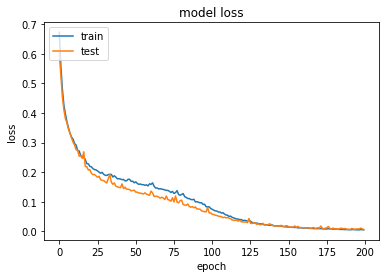

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[1071    1]
 [   3  956]]
99.80305268340719
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [50]:
data_train,data_val=train_test_split(train,test_size=0.25, random_state=10)
X_val=data_val.drop(['Class'], axis=1).values
y_val=data_val['Class'].ravel()

In [59]:
def train_nn_simple(data_train,X_val,y_val):
    

    data_train_new=data_train.sample(frac=0.632,replace=True)
    X_train=data_train_new.drop(['Class'], axis=1).values
    y_train=data_train_new['Class'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    X_train, 
    pd.get_dummies(pd.DataFrame(y_train), columns=[0]).as_matrix(),
    epochs=200, 
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_val).argmax(axis=1)]
    return y_pred
    

In [67]:
result=[]
for i in range(50):
    y_pred=train_nn_simple(train,X_val,y_val)
    result.append(y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train on 4107 samples, validate on 1027 samples
Epoch 1/200
 - 7s - loss: 0.8096 - acc: 0.5186 - val_loss: 0.6779 - val_acc: 0.7225

Epoch 00001: val_loss improved from inf to 0.67792, saving model to best.model
Epoch 2/200
 - 0s - loss: 0.7543 - acc: 0.5096 - val_loss: 0.6641 - val_acc: 0.5034

Epoch 00002: val_loss improved from 0.67792 to 0.66407, saving model to best.model
Epoch 3/200
 - 0s - loss: 0.7174 - acc: 0.5488 - val_loss: 0.6308 - val_acc: 0.7225

Epoch 00003: val_loss improved from 0.66407 to 0.63075, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.6712 - acc: 0.6002 - val_loss: 0.5822 - val_acc: 0.7352

Epoch 00004: val_loss improved from 0.63075 to 0.58222, saving model to best.model
Epoch 5/200
 - 0s - loss: 0.6188 - acc: 0.6669 - val_loss: 0.5024 - val_acc: 0.8072

Epoch 00005: val_loss improved from 0.58222 to 0.50241, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.5454 - acc: 0.7346 - val_loss: 0.4270 - val_acc: 0.8393

Epoch 00006: val_loss improved 

 - 0s - loss: 0.1751 - acc: 0.9367 - val_loss: 0.1198 - val_acc: 0.9649

Epoch 00050: val_loss improved from 0.12225 to 0.11983, saving model to best.model
Epoch 51/200
 - 0s - loss: 0.1783 - acc: 0.9416 - val_loss: 0.1216 - val_acc: 0.9572

Epoch 00051: val_loss did not improve from 0.11983
Epoch 52/200
 - 0s - loss: 0.1742 - acc: 0.9403 - val_loss: 0.1155 - val_acc: 0.9679

Epoch 00052: val_loss improved from 0.11983 to 0.11554, saving model to best.model
Epoch 53/200
 - 0s - loss: 0.1729 - acc: 0.9401 - val_loss: 0.1139 - val_acc: 0.9649

Epoch 00053: val_loss improved from 0.11554 to 0.11386, saving model to best.model
Epoch 54/200
 - 0s - loss: 0.1674 - acc: 0.9411 - val_loss: 0.1114 - val_acc: 0.9679

Epoch 00054: val_loss improved from 0.11386 to 0.11143, saving model to best.model
Epoch 55/200
 - 0s - loss: 0.1623 - acc: 0.9411 - val_loss: 0.1095 - val_acc: 0.9669

Epoch 00055: val_loss improved from 0.11143 to 0.10948, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.15


Epoch 00101: val_loss improved from 0.05353 to 0.05333, saving model to best.model
Epoch 102/200
 - 0s - loss: 0.0782 - acc: 0.9761 - val_loss: 0.0513 - val_acc: 0.9854

Epoch 00102: val_loss improved from 0.05333 to 0.05127, saving model to best.model
Epoch 103/200
 - 0s - loss: 0.0741 - acc: 0.9735 - val_loss: 0.0503 - val_acc: 0.9864

Epoch 00103: val_loss improved from 0.05127 to 0.05027, saving model to best.model
Epoch 104/200
 - 0s - loss: 0.0825 - acc: 0.9725 - val_loss: 0.0511 - val_acc: 0.9854

Epoch 00104: val_loss did not improve from 0.05027
Epoch 105/200
 - 0s - loss: 0.0735 - acc: 0.9725 - val_loss: 0.0492 - val_acc: 0.9854

Epoch 00105: val_loss improved from 0.05027 to 0.04924, saving model to best.model
Epoch 106/200
 - 0s - loss: 0.0754 - acc: 0.9752 - val_loss: 0.0491 - val_acc: 0.9873

Epoch 00106: val_loss improved from 0.04924 to 0.04908, saving model to best.model
Epoch 107/200
 - 0s - loss: 0.0730 - acc: 0.9742 - val_loss: 0.0459 - val_acc: 0.9873

Epoch 00107


Epoch 00153: val_loss did not improve from 0.02235
Epoch 154/200
 - 0s - loss: 0.0419 - acc: 0.9847 - val_loss: 0.0236 - val_acc: 0.9922

Epoch 00154: val_loss did not improve from 0.02235
Epoch 155/200
 - 0s - loss: 0.0476 - acc: 0.9825 - val_loss: 0.0226 - val_acc: 0.9942

Epoch 00155: val_loss did not improve from 0.02235
Train on 4107 samples, validate on 1027 samples
Epoch 1/200
 - 8s - loss: 0.7906 - acc: 0.5069 - val_loss: 0.6790 - val_acc: 0.5326

Epoch 00001: val_loss improved from inf to 0.67897, saving model to best.model
Epoch 2/200
 - 0s - loss: 0.7398 - acc: 0.5264 - val_loss: 0.6600 - val_acc: 0.7361

Epoch 00002: val_loss improved from 0.67897 to 0.65999, saving model to best.model
Epoch 3/200
 - 0s - loss: 0.6980 - acc: 0.5637 - val_loss: 0.6189 - val_acc: 0.7605

Epoch 00003: val_loss improved from 0.65999 to 0.61894, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.6566 - acc: 0.6138 - val_loss: 0.5510 - val_acc: 0.8267

Epoch 00004: val_loss improved from 0.6

 - 0s - loss: 0.1718 - acc: 0.9318 - val_loss: 0.1261 - val_acc: 0.9611

Epoch 00048: val_loss improved from 0.12985 to 0.12613, saving model to best.model
Epoch 49/200
 - 0s - loss: 0.1689 - acc: 0.9372 - val_loss: 0.1269 - val_acc: 0.9484

Epoch 00049: val_loss did not improve from 0.12613
Epoch 50/200
 - 0s - loss: 0.1624 - acc: 0.9391 - val_loss: 0.1212 - val_acc: 0.9640

Epoch 00050: val_loss improved from 0.12613 to 0.12119, saving model to best.model
Epoch 51/200
 - 0s - loss: 0.1660 - acc: 0.9399 - val_loss: 0.1162 - val_acc: 0.9620

Epoch 00051: val_loss improved from 0.12119 to 0.11618, saving model to best.model
Epoch 52/200
 - 0s - loss: 0.1493 - acc: 0.9425 - val_loss: 0.1132 - val_acc: 0.9640

Epoch 00052: val_loss improved from 0.11618 to 0.11316, saving model to best.model
Epoch 53/200
 - 0s - loss: 0.1562 - acc: 0.9406 - val_loss: 0.1120 - val_acc: 0.9679

Epoch 00053: val_loss improved from 0.11316 to 0.11204, saving model to best.model
Epoch 54/200
 - 0s - loss: 0.14


Epoch 00097: val_loss improved from 0.03775 to 0.03702, saving model to best.model
Epoch 98/200
 - 0s - loss: 0.0721 - acc: 0.9742 - val_loss: 0.0376 - val_acc: 0.9873

Epoch 00098: val_loss did not improve from 0.03702
Epoch 99/200
 - 0s - loss: 0.0692 - acc: 0.9701 - val_loss: 0.0368 - val_acc: 0.9873

Epoch 00099: val_loss improved from 0.03702 to 0.03675, saving model to best.model
Epoch 100/200
 - 0s - loss: 0.0668 - acc: 0.9744 - val_loss: 0.0353 - val_acc: 0.9864

Epoch 00100: val_loss improved from 0.03675 to 0.03532, saving model to best.model
Epoch 101/200
 - 0s - loss: 0.0694 - acc: 0.9708 - val_loss: 0.0340 - val_acc: 0.9873

Epoch 00101: val_loss improved from 0.03532 to 0.03398, saving model to best.model
Epoch 102/200
 - 0s - loss: 0.0725 - acc: 0.9754 - val_loss: 0.0367 - val_acc: 0.9864

Epoch 00102: val_loss did not improve from 0.03398
Epoch 103/200
 - 0s - loss: 0.0634 - acc: 0.9735 - val_loss: 0.0345 - val_acc: 0.9873

Epoch 00103: val_loss did not improve from 0.

 - 1s - loss: 0.3023 - acc: 0.8846 - val_loss: 0.2179 - val_acc: 0.9250

Epoch 00018: val_loss improved from 0.22121 to 0.21793, saving model to best.model
Epoch 19/200
 - 1s - loss: 0.2873 - acc: 0.8902 - val_loss: 0.2104 - val_acc: 0.9309

Epoch 00019: val_loss improved from 0.21793 to 0.21039, saving model to best.model
Epoch 20/200
 - 1s - loss: 0.2863 - acc: 0.8931 - val_loss: 0.2096 - val_acc: 0.9299

Epoch 00020: val_loss improved from 0.21039 to 0.20965, saving model to best.model
Epoch 21/200
 - 1s - loss: 0.2837 - acc: 0.8985 - val_loss: 0.2017 - val_acc: 0.9299

Epoch 00021: val_loss improved from 0.20965 to 0.20170, saving model to best.model
Epoch 22/200
 - 1s - loss: 0.2758 - acc: 0.8975 - val_loss: 0.1991 - val_acc: 0.9318

Epoch 00022: val_loss improved from 0.20170 to 0.19913, saving model to best.model
Epoch 23/200
 - 0s - loss: 0.2695 - acc: 0.9026 - val_loss: 0.1970 - val_acc: 0.9328

Epoch 00023: val_loss improved from 0.19913 to 0.19704, saving model to best.model


Epoch 00067: val_loss improved from 0.06894 to 0.06667, saving model to best.model
Epoch 68/200
 - 0s - loss: 0.1259 - acc: 0.9550 - val_loss: 0.0659 - val_acc: 0.9766

Epoch 00068: val_loss improved from 0.06667 to 0.06585, saving model to best.model
Epoch 69/200
 - 0s - loss: 0.1206 - acc: 0.9518 - val_loss: 0.0635 - val_acc: 0.9786

Epoch 00069: val_loss improved from 0.06585 to 0.06349, saving model to best.model
Epoch 70/200
 - 1s - loss: 0.1233 - acc: 0.9537 - val_loss: 0.0638 - val_acc: 0.9766

Epoch 00070: val_loss did not improve from 0.06349
Epoch 71/200
 - 1s - loss: 0.1158 - acc: 0.9547 - val_loss: 0.0610 - val_acc: 0.9766

Epoch 00071: val_loss improved from 0.06349 to 0.06100, saving model to best.model
Epoch 72/200
 - 1s - loss: 0.1102 - acc: 0.9584 - val_loss: 0.0570 - val_acc: 0.9786

Epoch 00072: val_loss improved from 0.06100 to 0.05705, saving model to best.model
Epoch 73/200
 - 1s - loss: 0.1149 - acc: 0.9603 - val_loss: 0.0551 - val_acc: 0.9796

Epoch 00073: val_


Epoch 00119: val_loss did not improve from 0.01797
Epoch 120/200
 - 1s - loss: 0.0621 - acc: 0.9764 - val_loss: 0.0185 - val_acc: 0.9932

Epoch 00120: val_loss did not improve from 0.01797
Epoch 121/200
 - 1s - loss: 0.0626 - acc: 0.9774 - val_loss: 0.0158 - val_acc: 0.9951

Epoch 00121: val_loss improved from 0.01797 to 0.01581, saving model to best.model
Epoch 122/200
 - 0s - loss: 0.0509 - acc: 0.9817 - val_loss: 0.0155 - val_acc: 0.9951

Epoch 00122: val_loss improved from 0.01581 to 0.01550, saving model to best.model
Epoch 123/200
 - 0s - loss: 0.0539 - acc: 0.9791 - val_loss: 0.0171 - val_acc: 0.9932

Epoch 00123: val_loss did not improve from 0.01550
Epoch 124/200
 - 0s - loss: 0.0532 - acc: 0.9800 - val_loss: 0.0152 - val_acc: 0.9951

Epoch 00124: val_loss improved from 0.01550 to 0.01518, saving model to best.model
Epoch 125/200
 - 0s - loss: 0.0496 - acc: 0.9793 - val_loss: 0.0149 - val_acc: 0.9942

Epoch 00125: val_loss improved from 0.01518 to 0.01485, saving model to bes

 - 1s - loss: 0.2666 - acc: 0.9002 - val_loss: 0.2253 - val_acc: 0.9104

Epoch 00021: val_loss improved from 0.22897 to 0.22528, saving model to best.model
Epoch 22/200
 - 0s - loss: 0.2597 - acc: 0.9038 - val_loss: 0.2179 - val_acc: 0.9172

Epoch 00022: val_loss improved from 0.22528 to 0.21794, saving model to best.model
Epoch 23/200
 - 1s - loss: 0.2561 - acc: 0.9063 - val_loss: 0.2113 - val_acc: 0.9211

Epoch 00023: val_loss improved from 0.21794 to 0.21127, saving model to best.model
Epoch 24/200
 - 0s - loss: 0.2442 - acc: 0.9138 - val_loss: 0.2112 - val_acc: 0.9211

Epoch 00024: val_loss improved from 0.21127 to 0.21116, saving model to best.model
Epoch 25/200
 - 0s - loss: 0.2545 - acc: 0.9053 - val_loss: 0.2026 - val_acc: 0.9231

Epoch 00025: val_loss improved from 0.21116 to 0.20260, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2475 - acc: 0.9126 - val_loss: 0.1998 - val_acc: 0.9231

Epoch 00026: val_loss improved from 0.20260 to 0.19982, saving model to best.model

 - 0s - loss: 0.1143 - acc: 0.9581 - val_loss: 0.0633 - val_acc: 0.9796

Epoch 00071: val_loss improved from 0.06457 to 0.06331, saving model to best.model
Epoch 72/200
 - 0s - loss: 0.1118 - acc: 0.9564 - val_loss: 0.0613 - val_acc: 0.9796

Epoch 00072: val_loss improved from 0.06331 to 0.06128, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.1093 - acc: 0.9574 - val_loss: 0.0596 - val_acc: 0.9796

Epoch 00073: val_loss improved from 0.06128 to 0.05961, saving model to best.model
Epoch 74/200
 - 0s - loss: 0.1139 - acc: 0.9542 - val_loss: 0.0608 - val_acc: 0.9815

Epoch 00074: val_loss did not improve from 0.05961
Epoch 75/200
 - 0s - loss: 0.1053 - acc: 0.9569 - val_loss: 0.0580 - val_acc: 0.9796

Epoch 00075: val_loss improved from 0.05961 to 0.05804, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1131 - acc: 0.9562 - val_loss: 0.0616 - val_acc: 0.9834

Epoch 00076: val_loss did not improve from 0.05804
Epoch 77/200
 - 0s - loss: 0.1047 - acc: 0.9608 - val_loss: 0.0


Epoch 00122: val_loss improved from 0.01972 to 0.01880, saving model to best.model
Epoch 123/200
 - 0s - loss: 0.0605 - acc: 0.9759 - val_loss: 0.0230 - val_acc: 0.9932

Epoch 00123: val_loss did not improve from 0.01880
Epoch 124/200
 - 0s - loss: 0.0497 - acc: 0.9817 - val_loss: 0.0205 - val_acc: 0.9932

Epoch 00124: val_loss did not improve from 0.01880
Epoch 125/200
 - 0s - loss: 0.0488 - acc: 0.9810 - val_loss: 0.0201 - val_acc: 0.9932

Epoch 00125: val_loss did not improve from 0.01880
Epoch 126/200
 - 0s - loss: 0.0524 - acc: 0.9798 - val_loss: 0.0195 - val_acc: 0.9932

Epoch 00126: val_loss did not improve from 0.01880
Epoch 127/200
 - 0s - loss: 0.0498 - acc: 0.9822 - val_loss: 0.0179 - val_acc: 0.9942

Epoch 00127: val_loss improved from 0.01880 to 0.01789, saving model to best.model
Epoch 128/200
 - 0s - loss: 0.0502 - acc: 0.9827 - val_loss: 0.0177 - val_acc: 0.9942

Epoch 00128: val_loss improved from 0.01789 to 0.01774, saving model to best.model
Epoch 129/200
 - 0s - lo


Epoch 00021: val_loss improved from 0.23047 to 0.22800, saving model to best.model
Epoch 22/200
 - 0s - loss: 0.2721 - acc: 0.8972 - val_loss: 0.2212 - val_acc: 0.9202

Epoch 00022: val_loss improved from 0.22800 to 0.22125, saving model to best.model
Epoch 23/200
 - 0s - loss: 0.2630 - acc: 0.8965 - val_loss: 0.2174 - val_acc: 0.9202

Epoch 00023: val_loss improved from 0.22125 to 0.21744, saving model to best.model
Epoch 24/200
 - 0s - loss: 0.2624 - acc: 0.9050 - val_loss: 0.2161 - val_acc: 0.9221

Epoch 00024: val_loss improved from 0.21744 to 0.21614, saving model to best.model
Epoch 25/200
 - 0s - loss: 0.2788 - acc: 0.8929 - val_loss: 0.2218 - val_acc: 0.9192

Epoch 00025: val_loss did not improve from 0.21614
Epoch 26/200
 - 0s - loss: 0.2503 - acc: 0.9094 - val_loss: 0.2084 - val_acc: 0.9250

Epoch 00026: val_loss improved from 0.21614 to 0.20841, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2520 - acc: 0.9016 - val_loss: 0.2057 - val_acc: 0.9241

Epoch 00027: val_

 - 0s - loss: 0.1212 - acc: 0.9525 - val_loss: 0.0844 - val_acc: 0.9698

Epoch 00071: val_loss improved from 0.08756 to 0.08443, saving model to best.model
Epoch 72/200
 - 0s - loss: 0.1158 - acc: 0.9542 - val_loss: 0.0832 - val_acc: 0.9698

Epoch 00072: val_loss improved from 0.08443 to 0.08315, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.1189 - acc: 0.9513 - val_loss: 0.0813 - val_acc: 0.9698

Epoch 00073: val_loss improved from 0.08315 to 0.08126, saving model to best.model
Epoch 74/200
 - 0s - loss: 0.1168 - acc: 0.9567 - val_loss: 0.0786 - val_acc: 0.9698

Epoch 00074: val_loss improved from 0.08126 to 0.07857, saving model to best.model
Epoch 75/200
 - 0s - loss: 0.1185 - acc: 0.9550 - val_loss: 0.0764 - val_acc: 0.9698

Epoch 00075: val_loss improved from 0.07857 to 0.07642, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1076 - acc: 0.9569 - val_loss: 0.0765 - val_acc: 0.9727

Epoch 00076: val_loss did not improve from 0.07642
Epoch 77/200
 - 0s - loss: 0.10

 - 0s - loss: 0.0589 - acc: 0.9781 - val_loss: 0.0274 - val_acc: 0.9873

Epoch 00123: val_loss improved from 0.02901 to 0.02744, saving model to best.model
Epoch 124/200
 - 0s - loss: 0.0565 - acc: 0.9788 - val_loss: 0.0294 - val_acc: 0.9864

Epoch 00124: val_loss did not improve from 0.02744
Epoch 125/200
 - 0s - loss: 0.0673 - acc: 0.9766 - val_loss: 0.0262 - val_acc: 0.9883

Epoch 00125: val_loss improved from 0.02744 to 0.02622, saving model to best.model
Epoch 126/200
 - 0s - loss: 0.0587 - acc: 0.9786 - val_loss: 0.0280 - val_acc: 0.9864

Epoch 00126: val_loss did not improve from 0.02622
Epoch 127/200
 - 0s - loss: 0.0557 - acc: 0.9813 - val_loss: 0.0254 - val_acc: 0.9883

Epoch 00127: val_loss improved from 0.02622 to 0.02544, saving model to best.model
Epoch 128/200
 - 0s - loss: 0.0489 - acc: 0.9808 - val_loss: 0.0252 - val_acc: 0.9883

Epoch 00128: val_loss improved from 0.02544 to 0.02515, saving model to best.model
Epoch 129/200
 - 0s - loss: 0.0537 - acc: 0.9786 - val_los


Epoch 00038: val_loss improved from 0.18391 to 0.17991, saving model to best.model
Epoch 39/200
 - 1s - loss: 0.1895 - acc: 0.9360 - val_loss: 0.1781 - val_acc: 0.9523

Epoch 00039: val_loss improved from 0.17991 to 0.17813, saving model to best.model
Epoch 40/200
 - 0s - loss: 0.1870 - acc: 0.9338 - val_loss: 0.1759 - val_acc: 0.9406

Epoch 00040: val_loss improved from 0.17813 to 0.17588, saving model to best.model
Epoch 41/200
 - 0s - loss: 0.1931 - acc: 0.9350 - val_loss: 0.1742 - val_acc: 0.9406

Epoch 00041: val_loss improved from 0.17588 to 0.17424, saving model to best.model
Epoch 42/200
 - 1s - loss: 0.1850 - acc: 0.9350 - val_loss: 0.1723 - val_acc: 0.9396

Epoch 00042: val_loss improved from 0.17424 to 0.17228, saving model to best.model
Epoch 43/200
 - 1s - loss: 0.1808 - acc: 0.9396 - val_loss: 0.1689 - val_acc: 0.9445

Epoch 00043: val_loss improved from 0.17228 to 0.16893, saving model to best.model
Epoch 44/200
 - 1s - loss: 0.1785 - acc: 0.9413 - val_loss: 0.1658 - va

 - 0s - loss: 0.0963 - acc: 0.9698 - val_loss: 0.0731 - val_acc: 0.9757

Epoch 00088: val_loss did not improve from 0.07257
Epoch 89/200
 - 0s - loss: 0.0970 - acc: 0.9664 - val_loss: 0.0693 - val_acc: 0.9815

Epoch 00089: val_loss improved from 0.07257 to 0.06926, saving model to best.model
Epoch 90/200
 - 0s - loss: 0.0983 - acc: 0.9669 - val_loss: 0.0693 - val_acc: 0.9815

Epoch 00090: val_loss did not improve from 0.06926
Epoch 91/200
 - 0s - loss: 0.0921 - acc: 0.9676 - val_loss: 0.0665 - val_acc: 0.9805

Epoch 00091: val_loss improved from 0.06926 to 0.06654, saving model to best.model
Epoch 92/200
 - 0s - loss: 0.0916 - acc: 0.9698 - val_loss: 0.0642 - val_acc: 0.9786

Epoch 00092: val_loss improved from 0.06654 to 0.06420, saving model to best.model
Epoch 93/200
 - 0s - loss: 0.0929 - acc: 0.9698 - val_loss: 0.0635 - val_acc: 0.9805

Epoch 00093: val_loss improved from 0.06420 to 0.06351, saving model to best.model
Epoch 94/200
 - 0s - loss: 0.0919 - acc: 0.9688 - val_loss: 0.0

 - 0s - loss: 0.0494 - acc: 0.9830 - val_loss: 0.0170 - val_acc: 0.9951

Epoch 00140: val_loss improved from 0.01795 to 0.01698, saving model to best.model
Epoch 141/200
 - 0s - loss: 0.0483 - acc: 0.9842 - val_loss: 0.0163 - val_acc: 0.9951

Epoch 00141: val_loss improved from 0.01698 to 0.01634, saving model to best.model
Epoch 142/200
 - 0s - loss: 0.0520 - acc: 0.9800 - val_loss: 0.0162 - val_acc: 0.9951

Epoch 00142: val_loss improved from 0.01634 to 0.01619, saving model to best.model
Epoch 143/200
 - 0s - loss: 0.0621 - acc: 0.9757 - val_loss: 0.0166 - val_acc: 0.9951

Epoch 00143: val_loss did not improve from 0.01619
Epoch 144/200
 - 0s - loss: 0.0541 - acc: 0.9805 - val_loss: 0.0197 - val_acc: 0.9922

Epoch 00144: val_loss did not improve from 0.01619
Epoch 145/200
 - 0s - loss: 0.0451 - acc: 0.9820 - val_loss: 0.0169 - val_acc: 0.9951

Epoch 00145: val_loss did not improve from 0.01619
Epoch 146/200
 - 0s - loss: 0.0458 - acc: 0.9864 - val_loss: 0.0149 - val_acc: 0.9951

Epo


Epoch 00022: val_loss improved from 0.19056 to 0.18756, saving model to best.model
Epoch 23/200
 - 0s - loss: 0.2633 - acc: 0.9009 - val_loss: 0.1860 - val_acc: 0.9328

Epoch 00023: val_loss improved from 0.18756 to 0.18604, saving model to best.model
Epoch 24/200
 - 0s - loss: 0.2655 - acc: 0.9014 - val_loss: 0.1887 - val_acc: 0.9318

Epoch 00024: val_loss did not improve from 0.18604
Epoch 25/200
 - 0s - loss: 0.2533 - acc: 0.9082 - val_loss: 0.1791 - val_acc: 0.9348

Epoch 00025: val_loss improved from 0.18604 to 0.17909, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2487 - acc: 0.9094 - val_loss: 0.1753 - val_acc: 0.9338

Epoch 00026: val_loss improved from 0.17909 to 0.17534, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2462 - acc: 0.9097 - val_loss: 0.1712 - val_acc: 0.9367

Epoch 00027: val_loss improved from 0.17534 to 0.17116, saving model to best.model
Epoch 28/200
 - 0s - loss: 0.2468 - acc: 0.9114 - val_loss: 0.1687 - val_acc: 0.9377

Epoch 00028: val_


Epoch 00072: val_loss improved from 0.05558 to 0.05464, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.1060 - acc: 0.9625 - val_loss: 0.0507 - val_acc: 0.9844

Epoch 00073: val_loss improved from 0.05464 to 0.05066, saving model to best.model
Epoch 74/200
 - 0s - loss: 0.1125 - acc: 0.9557 - val_loss: 0.0517 - val_acc: 0.9815

Epoch 00074: val_loss did not improve from 0.05066
Epoch 75/200
 - 0s - loss: 0.1037 - acc: 0.9598 - val_loss: 0.0476 - val_acc: 0.9854

Epoch 00075: val_loss improved from 0.05066 to 0.04759, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1130 - acc: 0.9557 - val_loss: 0.0475 - val_acc: 0.9854

Epoch 00076: val_loss improved from 0.04759 to 0.04746, saving model to best.model
Epoch 77/200
 - 0s - loss: 0.1021 - acc: 0.9620 - val_loss: 0.0448 - val_acc: 0.9844

Epoch 00077: val_loss improved from 0.04746 to 0.04477, saving model to best.model
Epoch 78/200
 - 0s - loss: 0.1025 - acc: 0.9562 - val_loss: 0.0452 - val_acc: 0.9873

Epoch 00078: val_

 - 0s - loss: 0.0498 - acc: 0.9820 - val_loss: 0.0136 - val_acc: 0.9961

Epoch 00125: val_loss improved from 0.01553 to 0.01359, saving model to best.model
Epoch 126/200
 - 0s - loss: 0.0590 - acc: 0.9776 - val_loss: 0.0162 - val_acc: 0.9942

Epoch 00126: val_loss did not improve from 0.01359
Epoch 127/200
 - 0s - loss: 0.0553 - acc: 0.9781 - val_loss: 0.0136 - val_acc: 0.9961

Epoch 00127: val_loss did not improve from 0.01359
Epoch 128/200
 - 0s - loss: 0.0561 - acc: 0.9769 - val_loss: 0.0139 - val_acc: 0.9961

Epoch 00128: val_loss did not improve from 0.01359
Epoch 129/200
 - 0s - loss: 0.0518 - acc: 0.9813 - val_loss: 0.0154 - val_acc: 0.9942

Epoch 00129: val_loss did not improve from 0.01359
Epoch 130/200
 - 0s - loss: 0.0590 - acc: 0.9788 - val_loss: 0.0135 - val_acc: 0.9961

Epoch 00130: val_loss improved from 0.01359 to 0.01348, saving model to best.model
Epoch 131/200
 - 0s - loss: 0.0478 - acc: 0.9813 - val_loss: 0.0139 - val_acc: 0.9951

Epoch 00131: val_loss did not impro

 - 0s - loss: 0.0293 - acc: 0.9898 - val_loss: 0.0057 - val_acc: 0.9981

Epoch 00178: val_loss did not improve from 0.00534
Epoch 179/200
 - 0s - loss: 0.0309 - acc: 0.9876 - val_loss: 0.0052 - val_acc: 1.0000

Epoch 00179: val_loss improved from 0.00534 to 0.00516, saving model to best.model
Epoch 180/200
 - 0s - loss: 0.0360 - acc: 0.9854 - val_loss: 0.0068 - val_acc: 0.9990

Epoch 00180: val_loss did not improve from 0.00516
Epoch 181/200
 - 0s - loss: 0.0387 - acc: 0.9859 - val_loss: 0.0055 - val_acc: 1.0000

Epoch 00181: val_loss did not improve from 0.00516
Epoch 182/200
 - 0s - loss: 0.0291 - acc: 0.9881 - val_loss: 0.0055 - val_acc: 0.9990

Epoch 00182: val_loss did not improve from 0.00516
Epoch 183/200
 - 0s - loss: 0.0297 - acc: 0.9881 - val_loss: 0.0049 - val_acc: 0.9990

Epoch 00183: val_loss improved from 0.00516 to 0.00494, saving model to best.model
Epoch 184/200
 - 0s - loss: 0.0270 - acc: 0.9903 - val_loss: 0.0051 - val_acc: 0.9981

Epoch 00184: val_loss did not impro

 - 0s - loss: 0.2275 - acc: 0.9235 - val_loss: 0.2181 - val_acc: 0.9202

Epoch 00031: val_loss did not improve from 0.21413
Epoch 32/200
 - 0s - loss: 0.2212 - acc: 0.9245 - val_loss: 0.2095 - val_acc: 0.9270

Epoch 00032: val_loss improved from 0.21413 to 0.20952, saving model to best.model
Epoch 33/200
 - 0s - loss: 0.2121 - acc: 0.9240 - val_loss: 0.2087 - val_acc: 0.9221

Epoch 00033: val_loss improved from 0.20952 to 0.20867, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2098 - acc: 0.9279 - val_loss: 0.2012 - val_acc: 0.9279

Epoch 00034: val_loss improved from 0.20867 to 0.20124, saving model to best.model
Epoch 35/200
 - 0s - loss: 0.2073 - acc: 0.9294 - val_loss: 0.1983 - val_acc: 0.9279

Epoch 00035: val_loss improved from 0.20124 to 0.19834, saving model to best.model
Epoch 36/200
 - 0s - loss: 0.2007 - acc: 0.9272 - val_loss: 0.1983 - val_acc: 0.9241

Epoch 00036: val_loss improved from 0.19834 to 0.19829, saving model to best.model
Epoch 37/200
 - 0s - loss: 0.19

 - 0s - loss: 0.1092 - acc: 0.9618 - val_loss: 0.0713 - val_acc: 0.9776

Epoch 00081: val_loss improved from 0.07378 to 0.07132, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.1047 - acc: 0.9623 - val_loss: 0.0703 - val_acc: 0.9776

Epoch 00082: val_loss improved from 0.07132 to 0.07029, saving model to best.model
Epoch 83/200
 - 0s - loss: 0.1016 - acc: 0.9632 - val_loss: 0.0691 - val_acc: 0.9776

Epoch 00083: val_loss improved from 0.07029 to 0.06911, saving model to best.model
Epoch 84/200
 - 0s - loss: 0.0955 - acc: 0.9659 - val_loss: 0.0688 - val_acc: 0.9786

Epoch 00084: val_loss improved from 0.06911 to 0.06880, saving model to best.model
Epoch 85/200
 - 0s - loss: 0.0974 - acc: 0.9640 - val_loss: 0.0689 - val_acc: 0.9766

Epoch 00085: val_loss did not improve from 0.06880
Epoch 86/200
 - 0s - loss: 0.0934 - acc: 0.9671 - val_loss: 0.0658 - val_acc: 0.9786

Epoch 00086: val_loss improved from 0.06880 to 0.06581, saving model to best.model
Epoch 87/200
 - 0s - loss: 0.09

 - 0s - loss: 0.0573 - acc: 0.9795 - val_loss: 0.0198 - val_acc: 0.9942

Epoch 00132: val_loss improved from 0.02077 to 0.01976, saving model to best.model
Epoch 133/200
 - 0s - loss: 0.0573 - acc: 0.9786 - val_loss: 0.0189 - val_acc: 0.9942

Epoch 00133: val_loss improved from 0.01976 to 0.01885, saving model to best.model
Epoch 134/200
 - 0s - loss: 0.0533 - acc: 0.9822 - val_loss: 0.0188 - val_acc: 0.9942

Epoch 00134: val_loss improved from 0.01885 to 0.01883, saving model to best.model
Epoch 135/200
 - 0s - loss: 0.0512 - acc: 0.9834 - val_loss: 0.0185 - val_acc: 0.9942

Epoch 00135: val_loss improved from 0.01883 to 0.01854, saving model to best.model
Epoch 136/200
 - 0s - loss: 0.0545 - acc: 0.9798 - val_loss: 0.0170 - val_acc: 0.9951

Epoch 00136: val_loss improved from 0.01854 to 0.01704, saving model to best.model
Epoch 137/200
 - 0s - loss: 0.0527 - acc: 0.9810 - val_loss: 0.0173 - val_acc: 0.9951

Epoch 00137: val_loss did not improve from 0.01704
Epoch 138/200
 - 0s - loss

 - 0s - loss: 0.5523 - acc: 0.7229 - val_loss: 0.4364 - val_acc: 0.8364

Epoch 00005: val_loss improved from 0.51918 to 0.43641, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.4868 - acc: 0.7806 - val_loss: 0.3800 - val_acc: 0.8471

Epoch 00006: val_loss improved from 0.43641 to 0.38005, saving model to best.model
Epoch 7/200
 - 0s - loss: 0.4449 - acc: 0.8064 - val_loss: 0.3448 - val_acc: 0.8608

Epoch 00007: val_loss improved from 0.38005 to 0.34478, saving model to best.model
Epoch 8/200
 - 0s - loss: 0.4069 - acc: 0.8269 - val_loss: 0.3263 - val_acc: 0.8754

Epoch 00008: val_loss improved from 0.34478 to 0.32625, saving model to best.model
Epoch 9/200
 - 0s - loss: 0.3892 - acc: 0.8447 - val_loss: 0.3056 - val_acc: 0.8832

Epoch 00009: val_loss improved from 0.32625 to 0.30559, saving model to best.model
Epoch 10/200
 - 0s - loss: 0.3787 - acc: 0.8434 - val_loss: 0.2925 - val_acc: 0.8870

Epoch 00010: val_loss improved from 0.30559 to 0.29251, saving model to best.model
Epo

 - 0s - loss: 0.1597 - acc: 0.9455 - val_loss: 0.1316 - val_acc: 0.9572

Epoch 00055: val_loss improved from 0.13716 to 0.13163, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1535 - acc: 0.9494 - val_loss: 0.1295 - val_acc: 0.9572

Epoch 00056: val_loss improved from 0.13163 to 0.12953, saving model to best.model
Epoch 57/200
 - 0s - loss: 0.1539 - acc: 0.9489 - val_loss: 0.1273 - val_acc: 0.9581

Epoch 00057: val_loss improved from 0.12953 to 0.12726, saving model to best.model
Epoch 58/200
 - 0s - loss: 0.1430 - acc: 0.9489 - val_loss: 0.1242 - val_acc: 0.9601

Epoch 00058: val_loss improved from 0.12726 to 0.12421, saving model to best.model
Epoch 59/200
 - 0s - loss: 0.1444 - acc: 0.9503 - val_loss: 0.1220 - val_acc: 0.9591

Epoch 00059: val_loss improved from 0.12421 to 0.12198, saving model to best.model
Epoch 60/200
 - 0s - loss: 0.1470 - acc: 0.9537 - val_loss: 0.1258 - val_acc: 0.9533

Epoch 00060: val_loss did not improve from 0.12198
Epoch 61/200
 - 0s - loss: 0.14


Epoch 00105: val_loss improved from 0.04226 to 0.04035, saving model to best.model
Epoch 106/200
 - 0s - loss: 0.0685 - acc: 0.9766 - val_loss: 0.0437 - val_acc: 0.9844

Epoch 00106: val_loss did not improve from 0.04035
Epoch 107/200
 - 0s - loss: 0.0731 - acc: 0.9757 - val_loss: 0.0426 - val_acc: 0.9854

Epoch 00107: val_loss did not improve from 0.04035
Epoch 108/200
 - 0s - loss: 0.0691 - acc: 0.9727 - val_loss: 0.0387 - val_acc: 0.9854

Epoch 00108: val_loss improved from 0.04035 to 0.03869, saving model to best.model
Epoch 109/200
 - 0s - loss: 0.0633 - acc: 0.9778 - val_loss: 0.0377 - val_acc: 0.9834

Epoch 00109: val_loss improved from 0.03869 to 0.03765, saving model to best.model
Epoch 110/200
 - 0s - loss: 0.0664 - acc: 0.9764 - val_loss: 0.0363 - val_acc: 0.9854

Epoch 00110: val_loss improved from 0.03765 to 0.03635, saving model to best.model
Epoch 111/200
 - 0s - loss: 0.0569 - acc: 0.9791 - val_loss: 0.0347 - val_acc: 0.9834

Epoch 00111: val_loss improved from 0.03635

 - 0s - loss: 0.2529 - acc: 0.9072 - val_loss: 0.2449 - val_acc: 0.9026

Epoch 00024: val_loss did not improve from 0.24308
Epoch 25/200
 - 0s - loss: 0.2564 - acc: 0.9094 - val_loss: 0.2352 - val_acc: 0.9046

Epoch 00025: val_loss improved from 0.24308 to 0.23524, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2469 - acc: 0.9077 - val_loss: 0.2384 - val_acc: 0.9094

Epoch 00026: val_loss did not improve from 0.23524
Epoch 27/200
 - 0s - loss: 0.2482 - acc: 0.9123 - val_loss: 0.2282 - val_acc: 0.9065

Epoch 00027: val_loss improved from 0.23524 to 0.22822, saving model to best.model
Epoch 28/200
 - 0s - loss: 0.2332 - acc: 0.9177 - val_loss: 0.2216 - val_acc: 0.9153

Epoch 00028: val_loss improved from 0.22822 to 0.22158, saving model to best.model
Epoch 29/200
 - 0s - loss: 0.2382 - acc: 0.9116 - val_loss: 0.2276 - val_acc: 0.9056

Epoch 00029: val_loss did not improve from 0.22158
Epoch 30/200
 - 0s - loss: 0.2275 - acc: 0.9165 - val_loss: 0.2181 - val_acc: 0.9124

Epoch 000

 - 0s - loss: 0.1103 - acc: 0.9586 - val_loss: 0.0678 - val_acc: 0.9757

Epoch 00076: val_loss improved from 0.07159 to 0.06777, saving model to best.model
Epoch 77/200
 - 0s - loss: 0.1011 - acc: 0.9586 - val_loss: 0.0655 - val_acc: 0.9786

Epoch 00077: val_loss improved from 0.06777 to 0.06550, saving model to best.model
Epoch 78/200
 - 0s - loss: 0.0957 - acc: 0.9645 - val_loss: 0.0668 - val_acc: 0.9796

Epoch 00078: val_loss did not improve from 0.06550
Epoch 79/200
 - 0s - loss: 0.0940 - acc: 0.9625 - val_loss: 0.0622 - val_acc: 0.9786

Epoch 00079: val_loss improved from 0.06550 to 0.06225, saving model to best.model
Epoch 80/200
 - 0s - loss: 0.0914 - acc: 0.9652 - val_loss: 0.0629 - val_acc: 0.9757

Epoch 00080: val_loss did not improve from 0.06225
Epoch 81/200
 - 0s - loss: 0.0895 - acc: 0.9654 - val_loss: 0.0616 - val_acc: 0.9805

Epoch 00081: val_loss improved from 0.06225 to 0.06161, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.0814 - acc: 0.9705 - val_loss: 0.0

 - 0s - loss: 0.5029 - acc: 0.7628 - val_loss: 0.4558 - val_acc: 0.8121

Epoch 00006: val_loss improved from 0.48269 to 0.45582, saving model to best.model
Epoch 7/200
 - 0s - loss: 0.4660 - acc: 0.7935 - val_loss: 0.4142 - val_acc: 0.8325

Epoch 00007: val_loss improved from 0.45582 to 0.41415, saving model to best.model
Epoch 8/200
 - 0s - loss: 0.4310 - acc: 0.8198 - val_loss: 0.3903 - val_acc: 0.8413

Epoch 00008: val_loss improved from 0.41415 to 0.39028, saving model to best.model
Epoch 9/200
 - 0s - loss: 0.4019 - acc: 0.8383 - val_loss: 0.3754 - val_acc: 0.8423

Epoch 00009: val_loss improved from 0.39028 to 0.37540, saving model to best.model
Epoch 10/200
 - 0s - loss: 0.3869 - acc: 0.8410 - val_loss: 0.3571 - val_acc: 0.8578

Epoch 00010: val_loss improved from 0.37540 to 0.35709, saving model to best.model
Epoch 11/200
 - 0s - loss: 0.3688 - acc: 0.8568 - val_loss: 0.3392 - val_acc: 0.8647

Epoch 00011: val_loss improved from 0.35709 to 0.33917, saving model to best.model
Ep

 - 0s - loss: 0.1593 - acc: 0.9467 - val_loss: 0.1515 - val_acc: 0.9484

Epoch 00055: val_loss improved from 0.15252 to 0.15149, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1605 - acc: 0.9472 - val_loss: 0.1459 - val_acc: 0.9533

Epoch 00056: val_loss improved from 0.15149 to 0.14586, saving model to best.model
Epoch 57/200
 - 0s - loss: 0.1490 - acc: 0.9472 - val_loss: 0.1437 - val_acc: 0.9562

Epoch 00057: val_loss improved from 0.14586 to 0.14375, saving model to best.model
Epoch 58/200
 - 0s - loss: 0.1551 - acc: 0.9442 - val_loss: 0.1410 - val_acc: 0.9591

Epoch 00058: val_loss improved from 0.14375 to 0.14096, saving model to best.model
Epoch 59/200
 - 0s - loss: 0.1529 - acc: 0.9455 - val_loss: 0.1390 - val_acc: 0.9533

Epoch 00059: val_loss improved from 0.14096 to 0.13904, saving model to best.model
Epoch 60/200
 - 0s - loss: 0.1475 - acc: 0.9472 - val_loss: 0.1324 - val_acc: 0.9562

Epoch 00060: val_loss improved from 0.13904 to 0.13239, saving model to best.model


Epoch 00105: val_loss improved from 0.03881 to 0.03767, saving model to best.model
Epoch 106/200
 - 0s - loss: 0.0697 - acc: 0.9713 - val_loss: 0.0374 - val_acc: 0.9864

Epoch 00106: val_loss improved from 0.03767 to 0.03736, saving model to best.model
Epoch 107/200
 - 0s - loss: 0.0699 - acc: 0.9759 - val_loss: 0.0353 - val_acc: 0.9854

Epoch 00107: val_loss improved from 0.03736 to 0.03528, saving model to best.model
Epoch 108/200
 - 0s - loss: 0.0638 - acc: 0.9764 - val_loss: 0.0432 - val_acc: 0.9864

Epoch 00108: val_loss did not improve from 0.03528
Epoch 109/200
 - 0s - loss: 0.0709 - acc: 0.9735 - val_loss: 0.0349 - val_acc: 0.9854

Epoch 00109: val_loss improved from 0.03528 to 0.03492, saving model to best.model
Epoch 110/200
 - 0s - loss: 0.0702 - acc: 0.9735 - val_loss: 0.0341 - val_acc: 0.9873

Epoch 00110: val_loss improved from 0.03492 to 0.03407, saving model to best.model
Epoch 111/200
 - 0s - loss: 0.0714 - acc: 0.9739 - val_loss: 0.0437 - val_acc: 0.9844

Epoch 00111


Epoch 00001: val_loss improved from inf to 0.67052, saving model to best.model
Epoch 2/200
 - 0s - loss: 0.7473 - acc: 0.5279 - val_loss: 0.6463 - val_acc: 0.6495

Epoch 00002: val_loss improved from 0.67052 to 0.64629, saving model to best.model
Epoch 3/200
 - 0s - loss: 0.7034 - acc: 0.5722 - val_loss: 0.6051 - val_acc: 0.7371

Epoch 00003: val_loss improved from 0.64629 to 0.60509, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.6558 - acc: 0.6209 - val_loss: 0.5601 - val_acc: 0.7342

Epoch 00004: val_loss improved from 0.60509 to 0.56012, saving model to best.model
Epoch 5/200
 - 0s - loss: 0.5974 - acc: 0.6815 - val_loss: 0.4790 - val_acc: 0.8062

Epoch 00005: val_loss improved from 0.56012 to 0.47900, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.5274 - acc: 0.7495 - val_loss: 0.4263 - val_acc: 0.8354

Epoch 00006: val_loss improved from 0.47900 to 0.42630, saving model to best.model
Epoch 7/200
 - 0s - loss: 0.4727 - acc: 0.7896 - val_loss: 0.3972 - val_acc: 0.8


Epoch 00052: val_loss improved from 0.15382 to 0.14118, saving model to best.model
Epoch 53/200
 - 0s - loss: 0.1719 - acc: 0.9326 - val_loss: 0.1419 - val_acc: 0.9455

Epoch 00053: val_loss did not improve from 0.14118
Epoch 54/200
 - 0s - loss: 0.1780 - acc: 0.9311 - val_loss: 0.1506 - val_acc: 0.9299

Epoch 00054: val_loss did not improve from 0.14118
Epoch 55/200
 - 0s - loss: 0.1716 - acc: 0.9396 - val_loss: 0.1298 - val_acc: 0.9533

Epoch 00055: val_loss improved from 0.14118 to 0.12978, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1598 - acc: 0.9430 - val_loss: 0.1318 - val_acc: 0.9474

Epoch 00056: val_loss did not improve from 0.12978
Epoch 57/200
 - 0s - loss: 0.1557 - acc: 0.9435 - val_loss: 0.1242 - val_acc: 0.9513

Epoch 00057: val_loss improved from 0.12978 to 0.12424, saving model to best.model
Epoch 58/200
 - 0s - loss: 0.1613 - acc: 0.9396 - val_loss: 0.1192 - val_acc: 0.9572

Epoch 00058: val_loss improved from 0.12424 to 0.11925, saving model to best.mode

 - 0s - loss: 0.0688 - acc: 0.9752 - val_loss: 0.0433 - val_acc: 0.9864

Epoch 00106: val_loss did not improve from 0.04259
Epoch 107/200
 - 0s - loss: 0.0717 - acc: 0.9752 - val_loss: 0.0375 - val_acc: 0.9873

Epoch 00107: val_loss improved from 0.04259 to 0.03750, saving model to best.model
Epoch 108/200
 - 0s - loss: 0.0786 - acc: 0.9722 - val_loss: 0.0497 - val_acc: 0.9854

Epoch 00108: val_loss did not improve from 0.03750
Epoch 109/200
 - 0s - loss: 0.0739 - acc: 0.9722 - val_loss: 0.0360 - val_acc: 0.9864

Epoch 00109: val_loss improved from 0.03750 to 0.03598, saving model to best.model
Epoch 110/200
 - 0s - loss: 0.0682 - acc: 0.9754 - val_loss: 0.0460 - val_acc: 0.9864

Epoch 00110: val_loss did not improve from 0.03598
Epoch 111/200
 - 0s - loss: 0.0757 - acc: 0.9727 - val_loss: 0.0346 - val_acc: 0.9873

Epoch 00111: val_loss improved from 0.03598 to 0.03462, saving model to best.model
Epoch 112/200
 - 0s - loss: 0.0685 - acc: 0.9764 - val_loss: 0.0461 - val_acc: 0.9854

Epo


Epoch 00041: val_loss improved from 0.19889 to 0.19051, saving model to best.model
Epoch 42/200
 - 0s - loss: 0.1971 - acc: 0.9289 - val_loss: 0.1890 - val_acc: 0.9231

Epoch 00042: val_loss improved from 0.19051 to 0.18895, saving model to best.model
Epoch 43/200
 - 0s - loss: 0.1854 - acc: 0.9326 - val_loss: 0.1838 - val_acc: 0.9250

Epoch 00043: val_loss improved from 0.18895 to 0.18381, saving model to best.model
Epoch 44/200
 - 0s - loss: 0.1794 - acc: 0.9345 - val_loss: 0.1848 - val_acc: 0.9221

Epoch 00044: val_loss did not improve from 0.18381
Epoch 45/200
 - 0s - loss: 0.1769 - acc: 0.9357 - val_loss: 0.1834 - val_acc: 0.9221

Epoch 00045: val_loss improved from 0.18381 to 0.18341, saving model to best.model
Epoch 46/200
 - 0s - loss: 0.1760 - acc: 0.9347 - val_loss: 0.1721 - val_acc: 0.9348

Epoch 00046: val_loss improved from 0.18341 to 0.17209, saving model to best.model
Epoch 47/200
 - 0s - loss: 0.1722 - acc: 0.9364 - val_loss: 0.1747 - val_acc: 0.9250

Epoch 00047: val_

 - 0s - loss: 0.0748 - acc: 0.9725 - val_loss: 0.0475 - val_acc: 0.9844

Epoch 00093: val_loss did not improve from 0.04682
Epoch 94/200
 - 0s - loss: 0.0755 - acc: 0.9693 - val_loss: 0.0465 - val_acc: 0.9864

Epoch 00094: val_loss improved from 0.04682 to 0.04651, saving model to best.model
Epoch 95/200
 - 0s - loss: 0.0764 - acc: 0.9722 - val_loss: 0.0503 - val_acc: 0.9854

Epoch 00095: val_loss did not improve from 0.04651
Epoch 96/200
 - 0s - loss: 0.0790 - acc: 0.9708 - val_loss: 0.0456 - val_acc: 0.9844

Epoch 00096: val_loss improved from 0.04651 to 0.04558, saving model to best.model
Epoch 97/200
 - 0s - loss: 0.0700 - acc: 0.9732 - val_loss: 0.0434 - val_acc: 0.9854

Epoch 00097: val_loss improved from 0.04558 to 0.04338, saving model to best.model
Epoch 98/200
 - 0s - loss: 0.0713 - acc: 0.9742 - val_loss: 0.0437 - val_acc: 0.9854

Epoch 00098: val_loss did not improve from 0.04338
Epoch 99/200
 - 0s - loss: 0.0661 - acc: 0.9747 - val_loss: 0.0409 - val_acc: 0.9864

Epoch 000

 - 0s - loss: 0.2152 - acc: 0.9218 - val_loss: 0.1769 - val_acc: 0.9377

Epoch 00035: val_loss improved from 0.17703 to 0.17692, saving model to best.model
Epoch 36/200
 - 0s - loss: 0.2168 - acc: 0.9238 - val_loss: 0.1746 - val_acc: 0.9270

Epoch 00036: val_loss improved from 0.17692 to 0.17464, saving model to best.model
Epoch 37/200
 - 0s - loss: 0.2092 - acc: 0.9240 - val_loss: 0.1668 - val_acc: 0.9357

Epoch 00037: val_loss improved from 0.17464 to 0.16677, saving model to best.model
Epoch 38/200
 - 0s - loss: 0.2075 - acc: 0.9267 - val_loss: 0.1652 - val_acc: 0.9318

Epoch 00038: val_loss improved from 0.16677 to 0.16523, saving model to best.model
Epoch 39/200
 - 0s - loss: 0.2011 - acc: 0.9226 - val_loss: 0.1593 - val_acc: 0.9328

Epoch 00039: val_loss improved from 0.16523 to 0.15934, saving model to best.model
Epoch 40/200
 - 0s - loss: 0.2003 - acc: 0.9252 - val_loss: 0.1541 - val_acc: 0.9367

Epoch 00040: val_loss improved from 0.15934 to 0.15408, saving model to best.model

 - 0s - loss: 0.0972 - acc: 0.9627 - val_loss: 0.0561 - val_acc: 0.9844

Epoch 00085: val_loss did not improve from 0.05489
Epoch 86/200
 - 0s - loss: 0.0999 - acc: 0.9637 - val_loss: 0.0526 - val_acc: 0.9834

Epoch 00086: val_loss improved from 0.05489 to 0.05264, saving model to best.model
Epoch 87/200
 - 0s - loss: 0.0884 - acc: 0.9679 - val_loss: 0.0514 - val_acc: 0.9873

Epoch 00087: val_loss improved from 0.05264 to 0.05140, saving model to best.model
Epoch 88/200
 - 0s - loss: 0.0912 - acc: 0.9657 - val_loss: 0.0489 - val_acc: 0.9893

Epoch 00088: val_loss improved from 0.05140 to 0.04891, saving model to best.model
Epoch 89/200
 - 0s - loss: 0.0875 - acc: 0.9688 - val_loss: 0.0493 - val_acc: 0.9893

Epoch 00089: val_loss did not improve from 0.04891
Epoch 90/200
 - 0s - loss: 0.0863 - acc: 0.9645 - val_loss: 0.0473 - val_acc: 0.9873

Epoch 00090: val_loss improved from 0.04891 to 0.04727, saving model to best.model
Epoch 91/200
 - 0s - loss: 0.0850 - acc: 0.9647 - val_loss: 0.0

 - 0s - loss: 0.2400 - acc: 0.9136 - val_loss: 0.2124 - val_acc: 0.9231

Epoch 00024: val_loss did not improve from 0.20958
Epoch 25/200
 - 0s - loss: 0.2390 - acc: 0.9196 - val_loss: 0.2044 - val_acc: 0.9231

Epoch 00025: val_loss improved from 0.20958 to 0.20441, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2377 - acc: 0.9162 - val_loss: 0.1981 - val_acc: 0.9289

Epoch 00026: val_loss improved from 0.20441 to 0.19815, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2290 - acc: 0.9184 - val_loss: 0.1918 - val_acc: 0.9289

Epoch 00027: val_loss improved from 0.19815 to 0.19182, saving model to best.model
Epoch 28/200
 - 0s - loss: 0.2196 - acc: 0.9235 - val_loss: 0.1905 - val_acc: 0.9289

Epoch 00028: val_loss improved from 0.19182 to 0.19054, saving model to best.model
Epoch 29/200
 - 0s - loss: 0.2218 - acc: 0.9211 - val_loss: 0.1835 - val_acc: 0.9309

Epoch 00029: val_loss improved from 0.19054 to 0.18346, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.21

 - 0s - loss: 0.1027 - acc: 0.9623 - val_loss: 0.0536 - val_acc: 0.9796

Epoch 00077: val_loss improved from 0.05778 to 0.05356, saving model to best.model
Epoch 78/200
 - 0s - loss: 0.0973 - acc: 0.9652 - val_loss: 0.0466 - val_acc: 0.9805

Epoch 00078: val_loss improved from 0.05356 to 0.04655, saving model to best.model
Epoch 79/200
 - 0s - loss: 0.0953 - acc: 0.9625 - val_loss: 0.0430 - val_acc: 0.9815

Epoch 00079: val_loss improved from 0.04655 to 0.04295, saving model to best.model
Epoch 80/200
 - 0s - loss: 0.0950 - acc: 0.9649 - val_loss: 0.0493 - val_acc: 0.9834

Epoch 00080: val_loss did not improve from 0.04295
Epoch 81/200
 - 0s - loss: 0.0971 - acc: 0.9625 - val_loss: 0.0427 - val_acc: 0.9815

Epoch 00081: val_loss improved from 0.04295 to 0.04266, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.0976 - acc: 0.9659 - val_loss: 0.0475 - val_acc: 0.9834

Epoch 00082: val_loss did not improve from 0.04266
Epoch 83/200
 - 0s - loss: 0.0970 - acc: 0.9615 - val_loss: 0.0

 - 0s - loss: 0.0532 - acc: 0.9810 - val_loss: 0.0142 - val_acc: 0.9912

Epoch 00130: val_loss did not improve from 0.01341
Epoch 131/200
 - 0s - loss: 0.0520 - acc: 0.9808 - val_loss: 0.0126 - val_acc: 0.9961

Epoch 00131: val_loss improved from 0.01341 to 0.01258, saving model to best.model
Epoch 132/200
 - 0s - loss: 0.0502 - acc: 0.9815 - val_loss: 0.0152 - val_acc: 0.9912

Epoch 00132: val_loss did not improve from 0.01258
Epoch 133/200
 - 0s - loss: 0.0478 - acc: 0.9813 - val_loss: 0.0134 - val_acc: 0.9912

Epoch 00133: val_loss did not improve from 0.01258
Epoch 134/200
 - 0s - loss: 0.0473 - acc: 0.9803 - val_loss: 0.0131 - val_acc: 0.9932

Epoch 00134: val_loss did not improve from 0.01258
Epoch 135/200
 - 0s - loss: 0.0456 - acc: 0.9830 - val_loss: 0.0147 - val_acc: 0.9912

Epoch 00135: val_loss did not improve from 0.01258
Epoch 136/200
 - 0s - loss: 0.0380 - acc: 0.9871 - val_loss: 0.0114 - val_acc: 0.9961

Epoch 00136: val_loss improved from 0.01258 to 0.01137, saving mode

 - 0s - loss: 0.2366 - acc: 0.9126 - val_loss: 0.1932 - val_acc: 0.9221

Epoch 00030: val_loss improved from 0.19725 to 0.19321, saving model to best.model
Epoch 31/200
 - 0s - loss: 0.2269 - acc: 0.9179 - val_loss: 0.1893 - val_acc: 0.9250

Epoch 00031: val_loss improved from 0.19321 to 0.18934, saving model to best.model
Epoch 32/200
 - 0s - loss: 0.2222 - acc: 0.9182 - val_loss: 0.1951 - val_acc: 0.9241

Epoch 00032: val_loss did not improve from 0.18934
Epoch 33/200
 - 0s - loss: 0.2233 - acc: 0.9175 - val_loss: 0.1840 - val_acc: 0.9241

Epoch 00033: val_loss improved from 0.18934 to 0.18403, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2127 - acc: 0.9192 - val_loss: 0.1796 - val_acc: 0.9270

Epoch 00034: val_loss improved from 0.18403 to 0.17964, saving model to best.model
Epoch 35/200
 - 0s - loss: 0.2099 - acc: 0.9206 - val_loss: 0.1749 - val_acc: 0.9250

Epoch 00035: val_loss improved from 0.17964 to 0.17493, saving model to best.model
Epoch 36/200
 - 0s - loss: 0.20


Epoch 00081: val_loss improved from 0.06489 to 0.06126, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.0946 - acc: 0.9642 - val_loss: 0.0617 - val_acc: 0.9747

Epoch 00082: val_loss did not improve from 0.06126
Epoch 83/200
 - 0s - loss: 0.0985 - acc: 0.9606 - val_loss: 0.0571 - val_acc: 0.9737

Epoch 00083: val_loss improved from 0.06126 to 0.05707, saving model to best.model
Epoch 84/200
 - 0s - loss: 0.0952 - acc: 0.9625 - val_loss: 0.0574 - val_acc: 0.9747

Epoch 00084: val_loss did not improve from 0.05707
Epoch 85/200
 - 0s - loss: 0.0922 - acc: 0.9635 - val_loss: 0.0554 - val_acc: 0.9737

Epoch 00085: val_loss improved from 0.05707 to 0.05543, saving model to best.model
Epoch 86/200
 - 0s - loss: 0.0945 - acc: 0.9635 - val_loss: 0.0556 - val_acc: 0.9766

Epoch 00086: val_loss did not improve from 0.05543
Epoch 87/200
 - 0s - loss: 0.0925 - acc: 0.9630 - val_loss: 0.0531 - val_acc: 0.9737

Epoch 00087: val_loss improved from 0.05543 to 0.05305, saving model to best.mode


Epoch 00019: val_loss did not improve from 0.23183
Epoch 20/200
 - 0s - loss: 0.2536 - acc: 0.9148 - val_loss: 0.2228 - val_acc: 0.9221

Epoch 00020: val_loss improved from 0.23183 to 0.22283, saving model to best.model
Epoch 21/200
 - 0s - loss: 0.2527 - acc: 0.9106 - val_loss: 0.2218 - val_acc: 0.9202

Epoch 00021: val_loss improved from 0.22283 to 0.22178, saving model to best.model
Epoch 22/200
 - 0s - loss: 0.2505 - acc: 0.9165 - val_loss: 0.2191 - val_acc: 0.9192

Epoch 00022: val_loss improved from 0.22178 to 0.21915, saving model to best.model
Epoch 23/200
 - 0s - loss: 0.2410 - acc: 0.9165 - val_loss: 0.2144 - val_acc: 0.9289

Epoch 00023: val_loss improved from 0.21915 to 0.21436, saving model to best.model
Epoch 24/200
 - 0s - loss: 0.2361 - acc: 0.9167 - val_loss: 0.2162 - val_acc: 0.9221

Epoch 00024: val_loss did not improve from 0.21436
Epoch 25/200
 - 0s - loss: 0.2331 - acc: 0.9201 - val_loss: 0.2163 - val_acc: 0.9231

Epoch 00025: val_loss did not improve from 0.2143


Epoch 00071: val_loss improved from 0.09097 to 0.08494, saving model to best.model
Epoch 72/200
 - 0s - loss: 0.1202 - acc: 0.9603 - val_loss: 0.0836 - val_acc: 0.9766

Epoch 00072: val_loss improved from 0.08494 to 0.08364, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.1213 - acc: 0.9581 - val_loss: 0.0820 - val_acc: 0.9766

Epoch 00073: val_loss improved from 0.08364 to 0.08203, saving model to best.model
Epoch 74/200
 - 0s - loss: 0.1175 - acc: 0.9608 - val_loss: 0.0800 - val_acc: 0.9786

Epoch 00074: val_loss improved from 0.08203 to 0.07995, saving model to best.model
Epoch 75/200
 - 0s - loss: 0.1161 - acc: 0.9618 - val_loss: 0.0772 - val_acc: 0.9786

Epoch 00075: val_loss improved from 0.07995 to 0.07723, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1088 - acc: 0.9647 - val_loss: 0.0787 - val_acc: 0.9786

Epoch 00076: val_loss did not improve from 0.07723
Epoch 77/200
 - 0s - loss: 0.1061 - acc: 0.9674 - val_loss: 0.0747 - val_acc: 0.9815

Epoch 00077: val_

 - 0s - loss: 0.0652 - acc: 0.9752 - val_loss: 0.0343 - val_acc: 0.9893

Epoch 00122: val_loss improved from 0.03595 to 0.03426, saving model to best.model
Epoch 123/200
 - 0s - loss: 0.0692 - acc: 0.9757 - val_loss: 0.0348 - val_acc: 0.9864

Epoch 00123: val_loss did not improve from 0.03426
Epoch 124/200
 - 0s - loss: 0.0619 - acc: 0.9778 - val_loss: 0.0340 - val_acc: 0.9873

Epoch 00124: val_loss improved from 0.03426 to 0.03397, saving model to best.model
Epoch 125/200
 - 0s - loss: 0.0582 - acc: 0.9820 - val_loss: 0.0335 - val_acc: 0.9873

Epoch 00125: val_loss improved from 0.03397 to 0.03347, saving model to best.model
Epoch 126/200
 - 0s - loss: 0.0657 - acc: 0.9759 - val_loss: 0.0341 - val_acc: 0.9864

Epoch 00126: val_loss did not improve from 0.03347
Epoch 127/200
 - 0s - loss: 0.0608 - acc: 0.9774 - val_loss: 0.0332 - val_acc: 0.9893

Epoch 00127: val_loss improved from 0.03347 to 0.03322, saving model to best.model
Epoch 128/200
 - 0s - loss: 0.0597 - acc: 0.9798 - val_los


Epoch 00174: val_loss improved from 0.01627 to 0.01595, saving model to best.model
Epoch 175/200
 - 0s - loss: 0.0397 - acc: 0.9847 - val_loss: 0.0164 - val_acc: 0.9942

Epoch 00175: val_loss did not improve from 0.01595
Epoch 176/200
 - 0s - loss: 0.0355 - acc: 0.9876 - val_loss: 0.0161 - val_acc: 0.9951

Epoch 00176: val_loss did not improve from 0.01595
Epoch 177/200
 - 0s - loss: 0.0340 - acc: 0.9854 - val_loss: 0.0165 - val_acc: 0.9942

Epoch 00177: val_loss did not improve from 0.01595
Epoch 178/200
 - 0s - loss: 0.0327 - acc: 0.9883 - val_loss: 0.0149 - val_acc: 0.9961

Epoch 00178: val_loss improved from 0.01595 to 0.01490, saving model to best.model
Epoch 179/200
 - 0s - loss: 0.0323 - acc: 0.9890 - val_loss: 0.0155 - val_acc: 0.9942

Epoch 00179: val_loss did not improve from 0.01490
Epoch 180/200
 - 0s - loss: 0.0294 - acc: 0.9881 - val_loss: 0.0162 - val_acc: 0.9942

Epoch 00180: val_loss did not improve from 0.01490
Epoch 181/200
 - 0s - loss: 0.0405 - acc: 0.9851 - val_l


Epoch 00025: val_loss improved from 0.21862 to 0.21560, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2469 - acc: 0.9143 - val_loss: 0.2124 - val_acc: 0.9260

Epoch 00026: val_loss improved from 0.21560 to 0.21243, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2401 - acc: 0.9153 - val_loss: 0.2104 - val_acc: 0.9250

Epoch 00027: val_loss improved from 0.21243 to 0.21038, saving model to best.model
Epoch 28/200
 - 0s - loss: 0.2405 - acc: 0.9158 - val_loss: 0.2085 - val_acc: 0.9250

Epoch 00028: val_loss improved from 0.21038 to 0.20854, saving model to best.model
Epoch 29/200
 - 0s - loss: 0.2368 - acc: 0.9170 - val_loss: 0.2065 - val_acc: 0.9241

Epoch 00029: val_loss improved from 0.20854 to 0.20647, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.2337 - acc: 0.9150 - val_loss: 0.2053 - val_acc: 0.9241

Epoch 00030: val_loss improved from 0.20647 to 0.20530, saving model to best.model
Epoch 31/200
 - 0s - loss: 0.2305 - acc: 0.9226 - val_loss: 0.1974 - va


Epoch 00076: val_loss improved from 0.07930 to 0.07574, saving model to best.model
Epoch 77/200
 - 0s - loss: 0.0974 - acc: 0.9606 - val_loss: 0.0773 - val_acc: 0.9747

Epoch 00077: val_loss did not improve from 0.07574
Epoch 78/200
 - 0s - loss: 0.1003 - acc: 0.9640 - val_loss: 0.0714 - val_acc: 0.9727

Epoch 00078: val_loss improved from 0.07574 to 0.07142, saving model to best.model
Epoch 79/200
 - 0s - loss: 0.0948 - acc: 0.9649 - val_loss: 0.0708 - val_acc: 0.9727

Epoch 00079: val_loss improved from 0.07142 to 0.07080, saving model to best.model
Epoch 80/200
 - 0s - loss: 0.0974 - acc: 0.9645 - val_loss: 0.0675 - val_acc: 0.9727

Epoch 00080: val_loss improved from 0.07080 to 0.06751, saving model to best.model
Epoch 81/200
 - 0s - loss: 0.0905 - acc: 0.9666 - val_loss: 0.0653 - val_acc: 0.9757

Epoch 00081: val_loss improved from 0.06751 to 0.06532, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.0840 - acc: 0.9722 - val_loss: 0.0628 - val_acc: 0.9757

Epoch 00082: val_

 - 0s - loss: 0.3844 - acc: 0.8451 - val_loss: 0.3187 - val_acc: 0.8783

Epoch 00010: val_loss improved from 0.33776 to 0.31875, saving model to best.model
Epoch 11/200
 - 0s - loss: 0.3716 - acc: 0.8539 - val_loss: 0.3034 - val_acc: 0.8851

Epoch 00011: val_loss improved from 0.31875 to 0.30339, saving model to best.model
Epoch 12/200
 - 0s - loss: 0.3483 - acc: 0.8602 - val_loss: 0.2925 - val_acc: 0.8890

Epoch 00012: val_loss improved from 0.30339 to 0.29248, saving model to best.model
Epoch 13/200
 - 0s - loss: 0.3421 - acc: 0.8724 - val_loss: 0.2793 - val_acc: 0.8997

Epoch 00013: val_loss improved from 0.29248 to 0.27934, saving model to best.model
Epoch 14/200
 - 0s - loss: 0.3216 - acc: 0.8797 - val_loss: 0.2723 - val_acc: 0.9026

Epoch 00014: val_loss improved from 0.27934 to 0.27226, saving model to best.model
Epoch 15/200
 - 0s - loss: 0.3176 - acc: 0.8797 - val_loss: 0.2701 - val_acc: 0.9046

Epoch 00015: val_loss improved from 0.27226 to 0.27014, saving model to best.model


Epoch 00059: val_loss improved from 0.12585 to 0.12338, saving model to best.model
Epoch 60/200
 - 0s - loss: 0.1409 - acc: 0.9491 - val_loss: 0.1206 - val_acc: 0.9659

Epoch 00060: val_loss improved from 0.12338 to 0.12063, saving model to best.model
Epoch 61/200
 - 0s - loss: 0.1404 - acc: 0.9481 - val_loss: 0.1183 - val_acc: 0.9659

Epoch 00061: val_loss improved from 0.12063 to 0.11833, saving model to best.model
Epoch 62/200
 - 0s - loss: 0.1462 - acc: 0.9469 - val_loss: 0.1187 - val_acc: 0.9659

Epoch 00062: val_loss did not improve from 0.11833
Epoch 63/200
 - 0s - loss: 0.1331 - acc: 0.9494 - val_loss: 0.1148 - val_acc: 0.9708

Epoch 00063: val_loss improved from 0.11833 to 0.11478, saving model to best.model
Epoch 64/200
 - 0s - loss: 0.1419 - acc: 0.9494 - val_loss: 0.1118 - val_acc: 0.9688

Epoch 00064: val_loss improved from 0.11478 to 0.11181, saving model to best.model
Epoch 65/200
 - 0s - loss: 0.1343 - acc: 0.9506 - val_loss: 0.1081 - val_acc: 0.9708

Epoch 00065: val_

 - 0s - loss: 0.0664 - acc: 0.9759 - val_loss: 0.0366 - val_acc: 0.9873

Epoch 00110: val_loss did not improve from 0.03572
Epoch 111/200
 - 0s - loss: 0.0635 - acc: 0.9759 - val_loss: 0.0340 - val_acc: 0.9864

Epoch 00111: val_loss improved from 0.03572 to 0.03403, saving model to best.model
Epoch 112/200
 - 0s - loss: 0.0625 - acc: 0.9771 - val_loss: 0.0334 - val_acc: 0.9883

Epoch 00112: val_loss improved from 0.03403 to 0.03336, saving model to best.model
Epoch 113/200
 - 0s - loss: 0.0518 - acc: 0.9808 - val_loss: 0.0340 - val_acc: 0.9883

Epoch 00113: val_loss did not improve from 0.03336
Epoch 114/200
 - 0s - loss: 0.0618 - acc: 0.9752 - val_loss: 0.0297 - val_acc: 0.9893

Epoch 00114: val_loss improved from 0.03336 to 0.02970, saving model to best.model
Epoch 115/200
 - 0s - loss: 0.0583 - acc: 0.9781 - val_loss: 0.0303 - val_acc: 0.9883

Epoch 00115: val_loss did not improve from 0.02970
Epoch 116/200
 - 0s - loss: 0.0568 - acc: 0.9793 - val_loss: 0.0290 - val_acc: 0.9883

Epo

 - 0s - loss: 0.2465 - acc: 0.9145 - val_loss: 0.2449 - val_acc: 0.9085

Epoch 00026: val_loss improved from 0.24600 to 0.24495, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2359 - acc: 0.9192 - val_loss: 0.2374 - val_acc: 0.9172

Epoch 00027: val_loss improved from 0.24495 to 0.23740, saving model to best.model
Epoch 28/200
 - 0s - loss: 0.2386 - acc: 0.9170 - val_loss: 0.2350 - val_acc: 0.9143

Epoch 00028: val_loss improved from 0.23740 to 0.23501, saving model to best.model
Epoch 29/200
 - 0s - loss: 0.2334 - acc: 0.9209 - val_loss: 0.2333 - val_acc: 0.9143

Epoch 00029: val_loss improved from 0.23501 to 0.23331, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.2340 - acc: 0.9187 - val_loss: 0.2386 - val_acc: 0.9114

Epoch 00030: val_loss did not improve from 0.23331
Epoch 31/200
 - 0s - loss: 0.2249 - acc: 0.9223 - val_loss: 0.2221 - val_acc: 0.9163

Epoch 00031: val_loss improved from 0.23331 to 0.22212, saving model to best.model
Epoch 32/200
 - 0s - loss: 0.23


Epoch 00078: val_loss improved from 0.08889 to 0.08238, saving model to best.model
Epoch 79/200
 - 0s - loss: 0.1033 - acc: 0.9630 - val_loss: 0.0892 - val_acc: 0.9698

Epoch 00079: val_loss did not improve from 0.08238
Epoch 80/200
 - 0s - loss: 0.0918 - acc: 0.9637 - val_loss: 0.0807 - val_acc: 0.9698

Epoch 00080: val_loss improved from 0.08238 to 0.08069, saving model to best.model
Epoch 81/200
 - 0s - loss: 0.0925 - acc: 0.9654 - val_loss: 0.0812 - val_acc: 0.9727

Epoch 00081: val_loss did not improve from 0.08069
Epoch 82/200
 - 0s - loss: 0.1020 - acc: 0.9635 - val_loss: 0.0884 - val_acc: 0.9737

Epoch 00082: val_loss did not improve from 0.08069
Epoch 83/200
 - 0s - loss: 0.0944 - acc: 0.9664 - val_loss: 0.0770 - val_acc: 0.9747

Epoch 00083: val_loss improved from 0.08069 to 0.07701, saving model to best.model
Epoch 84/200
 - 0s - loss: 0.0857 - acc: 0.9696 - val_loss: 0.0767 - val_acc: 0.9757

Epoch 00084: val_loss improved from 0.07701 to 0.07669, saving model to best.mode

 - 0s - loss: 0.3023 - acc: 0.8899 - val_loss: 0.2553 - val_acc: 0.8997

Epoch 00016: val_loss improved from 0.26475 to 0.25526, saving model to best.model
Epoch 17/200
 - 1s - loss: 0.2930 - acc: 0.8895 - val_loss: 0.2482 - val_acc: 0.9094

Epoch 00017: val_loss improved from 0.25526 to 0.24824, saving model to best.model
Epoch 18/200
 - 1s - loss: 0.2949 - acc: 0.8880 - val_loss: 0.2429 - val_acc: 0.9124

Epoch 00018: val_loss improved from 0.24824 to 0.24295, saving model to best.model
Epoch 19/200
 - 0s - loss: 0.2861 - acc: 0.8929 - val_loss: 0.2468 - val_acc: 0.9065

Epoch 00019: val_loss did not improve from 0.24295
Epoch 20/200
 - 1s - loss: 0.2861 - acc: 0.8963 - val_loss: 0.2348 - val_acc: 0.9094

Epoch 00020: val_loss improved from 0.24295 to 0.23476, saving model to best.model
Epoch 21/200
 - 0s - loss: 0.2726 - acc: 0.9016 - val_loss: 0.2278 - val_acc: 0.9153

Epoch 00021: val_loss improved from 0.23476 to 0.22778, saving model to best.model
Epoch 22/200
 - 0s - loss: 0.27

 - 0s - loss: 0.1185 - acc: 0.9547 - val_loss: 0.0664 - val_acc: 0.9766

Epoch 00067: val_loss improved from 0.07124 to 0.06645, saving model to best.model
Epoch 68/200
 - 0s - loss: 0.1228 - acc: 0.9574 - val_loss: 0.0725 - val_acc: 0.9757

Epoch 00068: val_loss did not improve from 0.06645
Epoch 69/200
 - 0s - loss: 0.1099 - acc: 0.9608 - val_loss: 0.0655 - val_acc: 0.9815

Epoch 00069: val_loss improved from 0.06645 to 0.06551, saving model to best.model
Epoch 70/200
 - 0s - loss: 0.1158 - acc: 0.9535 - val_loss: 0.0634 - val_acc: 0.9815

Epoch 00070: val_loss improved from 0.06551 to 0.06341, saving model to best.model
Epoch 71/200
 - 0s - loss: 0.1092 - acc: 0.9586 - val_loss: 0.0620 - val_acc: 0.9805

Epoch 00071: val_loss improved from 0.06341 to 0.06195, saving model to best.model
Epoch 72/200
 - 0s - loss: 0.1121 - acc: 0.9586 - val_loss: 0.0597 - val_acc: 0.9844

Epoch 00072: val_loss improved from 0.06195 to 0.05972, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.10

 - 0s - loss: 0.0643 - acc: 0.9764 - val_loss: 0.0180 - val_acc: 0.9942

Epoch 00120: val_loss improved from 0.01872 to 0.01802, saving model to best.model
Epoch 121/200
 - 0s - loss: 0.0585 - acc: 0.9786 - val_loss: 0.0205 - val_acc: 0.9932

Epoch 00121: val_loss did not improve from 0.01802
Epoch 122/200
 - 0s - loss: 0.0557 - acc: 0.9791 - val_loss: 0.0224 - val_acc: 0.9922

Epoch 00122: val_loss did not improve from 0.01802
Epoch 123/200
 - 0s - loss: 0.0547 - acc: 0.9781 - val_loss: 0.0172 - val_acc: 0.9942

Epoch 00123: val_loss improved from 0.01802 to 0.01717, saving model to best.model
Epoch 124/200
 - 0s - loss: 0.0516 - acc: 0.9820 - val_loss: 0.0165 - val_acc: 0.9932

Epoch 00124: val_loss improved from 0.01717 to 0.01652, saving model to best.model
Epoch 125/200
 - 0s - loss: 0.0541 - acc: 0.9810 - val_loss: 0.0214 - val_acc: 0.9922

Epoch 00125: val_loss did not improve from 0.01652
Epoch 126/200
 - 0s - loss: 0.0492 - acc: 0.9800 - val_loss: 0.0164 - val_acc: 0.9932

Epo

 - 0s - loss: 0.4850 - acc: 0.7862 - val_loss: 0.3749 - val_acc: 0.8685

Epoch 00006: val_loss improved from 0.42396 to 0.37488, saving model to best.model
Epoch 7/200
 - 1s - loss: 0.4331 - acc: 0.8167 - val_loss: 0.3359 - val_acc: 0.8783

Epoch 00007: val_loss improved from 0.37488 to 0.33587, saving model to best.model
Epoch 8/200
 - 0s - loss: 0.4134 - acc: 0.8310 - val_loss: 0.3132 - val_acc: 0.8861

Epoch 00008: val_loss improved from 0.33587 to 0.31325, saving model to best.model
Epoch 9/200
 - 0s - loss: 0.3833 - acc: 0.8529 - val_loss: 0.2925 - val_acc: 0.8909

Epoch 00009: val_loss improved from 0.31325 to 0.29246, saving model to best.model
Epoch 10/200
 - 0s - loss: 0.3705 - acc: 0.8598 - val_loss: 0.2764 - val_acc: 0.8958

Epoch 00010: val_loss improved from 0.29246 to 0.27637, saving model to best.model
Epoch 11/200
 - 0s - loss: 0.3513 - acc: 0.8656 - val_loss: 0.2691 - val_acc: 0.8948

Epoch 00011: val_loss improved from 0.27637 to 0.26913, saving model to best.model
Ep

 - 0s - loss: 0.1450 - acc: 0.9406 - val_loss: 0.0888 - val_acc: 0.9581

Epoch 00055: val_loss improved from 0.09221 to 0.08883, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1478 - acc: 0.9382 - val_loss: 0.0844 - val_acc: 0.9640

Epoch 00056: val_loss improved from 0.08883 to 0.08442, saving model to best.model
Epoch 57/200
 - 0s - loss: 0.1383 - acc: 0.9421 - val_loss: 0.0835 - val_acc: 0.9708

Epoch 00057: val_loss improved from 0.08442 to 0.08353, saving model to best.model
Epoch 58/200
 - 0s - loss: 0.1377 - acc: 0.9445 - val_loss: 0.0775 - val_acc: 0.9708

Epoch 00058: val_loss improved from 0.08353 to 0.07746, saving model to best.model
Epoch 59/200
 - 0s - loss: 0.1320 - acc: 0.9467 - val_loss: 0.0740 - val_acc: 0.9747

Epoch 00059: val_loss improved from 0.07746 to 0.07399, saving model to best.model
Epoch 60/200
 - 0s - loss: 0.1340 - acc: 0.9498 - val_loss: 0.0719 - val_acc: 0.9786

Epoch 00060: val_loss improved from 0.07399 to 0.07191, saving model to best.model


Epoch 00003: val_loss improved from 0.63820 to 0.58343, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.6207 - acc: 0.6594 - val_loss: 0.5096 - val_acc: 0.8140

Epoch 00004: val_loss improved from 0.58343 to 0.50960, saving model to best.model
Epoch 5/200
 - 0s - loss: 0.5557 - acc: 0.7297 - val_loss: 0.4425 - val_acc: 0.8267

Epoch 00005: val_loss improved from 0.50960 to 0.44245, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.4874 - acc: 0.7784 - val_loss: 0.4057 - val_acc: 0.8335

Epoch 00006: val_loss improved from 0.44245 to 0.40573, saving model to best.model
Epoch 7/200
 - 0s - loss: 0.4549 - acc: 0.8040 - val_loss: 0.3806 - val_acc: 0.8491

Epoch 00007: val_loss improved from 0.40573 to 0.38062, saving model to best.model
Epoch 8/200
 - 0s - loss: 0.4183 - acc: 0.8259 - val_loss: 0.3578 - val_acc: 0.8637

Epoch 00008: val_loss improved from 0.38062 to 0.35776, saving model to best.model
Epoch 9/200
 - 0s - loss: 0.3919 - acc: 0.8434 - val_loss: 0.3397 - val_acc:

 - 0s - loss: 0.1529 - acc: 0.9481 - val_loss: 0.1204 - val_acc: 0.9640

Epoch 00053: val_loss improved from 0.12235 to 0.12038, saving model to best.model
Epoch 54/200
 - 0s - loss: 0.1525 - acc: 0.9459 - val_loss: 0.1185 - val_acc: 0.9640

Epoch 00054: val_loss improved from 0.12038 to 0.11852, saving model to best.model
Epoch 55/200
 - 0s - loss: 0.1404 - acc: 0.9486 - val_loss: 0.1162 - val_acc: 0.9649

Epoch 00055: val_loss improved from 0.11852 to 0.11618, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1448 - acc: 0.9477 - val_loss: 0.1134 - val_acc: 0.9630

Epoch 00056: val_loss improved from 0.11618 to 0.11337, saving model to best.model
Epoch 57/200
 - 0s - loss: 0.1412 - acc: 0.9508 - val_loss: 0.1107 - val_acc: 0.9688

Epoch 00057: val_loss improved from 0.11337 to 0.11070, saving model to best.model
Epoch 58/200
 - 0s - loss: 0.1390 - acc: 0.9503 - val_loss: 0.1085 - val_acc: 0.9669

Epoch 00058: val_loss improved from 0.11070 to 0.10852, saving model to best.model

 - 0s - loss: 0.0683 - acc: 0.9747 - val_loss: 0.0457 - val_acc: 0.9854

Epoch 00105: val_loss improved from 0.04613 to 0.04571, saving model to best.model
Epoch 106/200
 - 0s - loss: 0.0666 - acc: 0.9747 - val_loss: 0.0420 - val_acc: 0.9864

Epoch 00106: val_loss improved from 0.04571 to 0.04201, saving model to best.model
Epoch 107/200
 - 0s - loss: 0.0676 - acc: 0.9732 - val_loss: 0.0427 - val_acc: 0.9864

Epoch 00107: val_loss did not improve from 0.04201
Epoch 108/200
 - 0s - loss: 0.0623 - acc: 0.9774 - val_loss: 0.0437 - val_acc: 0.9864

Epoch 00108: val_loss did not improve from 0.04201
Epoch 109/200
 - 0s - loss: 0.0737 - acc: 0.9742 - val_loss: 0.0401 - val_acc: 0.9883

Epoch 00109: val_loss improved from 0.04201 to 0.04007, saving model to best.model
Epoch 110/200
 - 0s - loss: 0.0743 - acc: 0.9710 - val_loss: 0.0384 - val_acc: 0.9893

Epoch 00110: val_loss improved from 0.04007 to 0.03838, saving model to best.model
Epoch 111/200
 - 0s - loss: 0.0632 - acc: 0.9776 - val_los


Epoch 00040: val_loss improved from 0.18019 to 0.17806, saving model to best.model
Epoch 41/200
 - 0s - loss: 0.2032 - acc: 0.9282 - val_loss: 0.1745 - val_acc: 0.9348

Epoch 00041: val_loss improved from 0.17806 to 0.17448, saving model to best.model
Epoch 42/200
 - 0s - loss: 0.2017 - acc: 0.9262 - val_loss: 0.1703 - val_acc: 0.9338

Epoch 00042: val_loss improved from 0.17448 to 0.17029, saving model to best.model
Epoch 43/200
 - 0s - loss: 0.1912 - acc: 0.9330 - val_loss: 0.1691 - val_acc: 0.9377

Epoch 00043: val_loss improved from 0.17029 to 0.16913, saving model to best.model
Epoch 44/200
 - 0s - loss: 0.1918 - acc: 0.9304 - val_loss: 0.1646 - val_acc: 0.9328

Epoch 00044: val_loss improved from 0.16913 to 0.16461, saving model to best.model
Epoch 45/200
 - 0s - loss: 0.1876 - acc: 0.9340 - val_loss: 0.1639 - val_acc: 0.9367

Epoch 00045: val_loss improved from 0.16461 to 0.16392, saving model to best.model
Epoch 46/200
 - 0s - loss: 0.1921 - acc: 0.9343 - val_loss: 0.1616 - va

 - 0s - loss: 0.0913 - acc: 0.9645 - val_loss: 0.0567 - val_acc: 0.9825

Epoch 00090: val_loss did not improve from 0.05486
Epoch 91/200
 - 0s - loss: 0.0879 - acc: 0.9686 - val_loss: 0.0553 - val_acc: 0.9854

Epoch 00091: val_loss did not improve from 0.05486
Epoch 92/200
 - 0s - loss: 0.0890 - acc: 0.9664 - val_loss: 0.0534 - val_acc: 0.9854

Epoch 00092: val_loss improved from 0.05486 to 0.05341, saving model to best.model
Epoch 93/200
 - 0s - loss: 0.0915 - acc: 0.9649 - val_loss: 0.0513 - val_acc: 0.9815

Epoch 00093: val_loss improved from 0.05341 to 0.05127, saving model to best.model
Epoch 94/200
 - 0s - loss: 0.0970 - acc: 0.9635 - val_loss: 0.0522 - val_acc: 0.9864

Epoch 00094: val_loss did not improve from 0.05127
Epoch 95/200
 - 0s - loss: 0.0840 - acc: 0.9683 - val_loss: 0.0492 - val_acc: 0.9844

Epoch 00095: val_loss improved from 0.05127 to 0.04916, saving model to best.model
Epoch 96/200
 - 0s - loss: 0.0884 - acc: 0.9652 - val_loss: 0.0489 - val_acc: 0.9864

Epoch 000

 - 0s - loss: 0.0512 - acc: 0.9805 - val_loss: 0.0235 - val_acc: 0.9893

Epoch 00144: val_loss did not improve from 0.02140
Epoch 145/200
 - 0s - loss: 0.0598 - acc: 0.9788 - val_loss: 0.0230 - val_acc: 0.9903

Epoch 00145: val_loss did not improve from 0.02140
Epoch 146/200
 - 0s - loss: 0.0566 - acc: 0.9793 - val_loss: 0.0241 - val_acc: 0.9922

Epoch 00146: val_loss did not improve from 0.02140
Epoch 147/200
 - 0s - loss: 0.0546 - acc: 0.9795 - val_loss: 0.0247 - val_acc: 0.9903

Epoch 00147: val_loss did not improve from 0.02140
Epoch 148/200
 - 0s - loss: 0.0556 - acc: 0.9803 - val_loss: 0.0211 - val_acc: 0.9932

Epoch 00148: val_loss improved from 0.02140 to 0.02107, saving model to best.model
Epoch 149/200
 - 0s - loss: 0.0555 - acc: 0.9791 - val_loss: 0.0213 - val_acc: 0.9922

Epoch 00149: val_loss did not improve from 0.02107
Epoch 150/200
 - 0s - loss: 0.0453 - acc: 0.9825 - val_loss: 0.0208 - val_acc: 0.9922

Epoch 00150: val_loss improved from 0.02107 to 0.02080, saving mode

 - 0s - loss: 0.2416 - acc: 0.9150 - val_loss: 0.1994 - val_acc: 0.9270

Epoch 00033: val_loss improved from 0.20107 to 0.19939, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2340 - acc: 0.9170 - val_loss: 0.1969 - val_acc: 0.9299

Epoch 00034: val_loss improved from 0.19939 to 0.19689, saving model to best.model
Epoch 35/200
 - 0s - loss: 0.2378 - acc: 0.9170 - val_loss: 0.1938 - val_acc: 0.9318

Epoch 00035: val_loss improved from 0.19689 to 0.19384, saving model to best.model
Epoch 36/200
 - 0s - loss: 0.2294 - acc: 0.9155 - val_loss: 0.1897 - val_acc: 0.9318

Epoch 00036: val_loss improved from 0.19384 to 0.18974, saving model to best.model
Epoch 37/200
 - 0s - loss: 0.2216 - acc: 0.9218 - val_loss: 0.1910 - val_acc: 0.9299

Epoch 00037: val_loss did not improve from 0.18974
Epoch 38/200
 - 0s - loss: 0.2197 - acc: 0.9196 - val_loss: 0.1854 - val_acc: 0.9406

Epoch 00038: val_loss improved from 0.18974 to 0.18541, saving model to best.model
Epoch 39/200
 - 0s - loss: 0.21


Epoch 00082: val_loss improved from 0.06794 to 0.06755, saving model to best.model
Epoch 83/200
 - 0s - loss: 0.1082 - acc: 0.9579 - val_loss: 0.0645 - val_acc: 0.9825

Epoch 00083: val_loss improved from 0.06755 to 0.06454, saving model to best.model
Epoch 84/200
 - 0s - loss: 0.1079 - acc: 0.9610 - val_loss: 0.0601 - val_acc: 0.9834

Epoch 00084: val_loss improved from 0.06454 to 0.06012, saving model to best.model
Epoch 85/200
 - 0s - loss: 0.1001 - acc: 0.9649 - val_loss: 0.0602 - val_acc: 0.9834

Epoch 00085: val_loss did not improve from 0.06012
Epoch 86/200
 - 0s - loss: 0.1021 - acc: 0.9620 - val_loss: 0.0567 - val_acc: 0.9834

Epoch 00086: val_loss improved from 0.06012 to 0.05667, saving model to best.model
Epoch 87/200
 - 0s - loss: 0.0861 - acc: 0.9705 - val_loss: 0.0555 - val_acc: 0.9854

Epoch 00087: val_loss improved from 0.05667 to 0.05546, saving model to best.model
Epoch 88/200
 - 0s - loss: 0.0968 - acc: 0.9618 - val_loss: 0.0535 - val_acc: 0.9854

Epoch 00088: val_


Epoch 00025: val_loss improved from 0.18933 to 0.18701, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2413 - acc: 0.9131 - val_loss: 0.1839 - val_acc: 0.9357

Epoch 00026: val_loss improved from 0.18701 to 0.18389, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2377 - acc: 0.9160 - val_loss: 0.1804 - val_acc: 0.9357

Epoch 00027: val_loss improved from 0.18389 to 0.18045, saving model to best.model
Epoch 28/200
 - 0s - loss: 0.2267 - acc: 0.9170 - val_loss: 0.1842 - val_acc: 0.9338

Epoch 00028: val_loss did not improve from 0.18045
Epoch 29/200
 - 0s - loss: 0.2234 - acc: 0.9216 - val_loss: 0.1742 - val_acc: 0.9348

Epoch 00029: val_loss improved from 0.18045 to 0.17416, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.2210 - acc: 0.9194 - val_loss: 0.1724 - val_acc: 0.9357

Epoch 00030: val_loss improved from 0.17416 to 0.17236, saving model to best.model
Epoch 31/200
 - 0s - loss: 0.2184 - acc: 0.9184 - val_loss: 0.1690 - val_acc: 0.9367

Epoch 00031: val_

 - 0s - loss: 0.1021 - acc: 0.9625 - val_loss: 0.0647 - val_acc: 0.9786

Epoch 00076: val_loss did not improve from 0.06141
Epoch 77/200
 - 0s - loss: 0.0908 - acc: 0.9664 - val_loss: 0.0591 - val_acc: 0.9834

Epoch 00077: val_loss improved from 0.06141 to 0.05910, saving model to best.model
Epoch 78/200
 - 0s - loss: 0.1055 - acc: 0.9618 - val_loss: 0.0592 - val_acc: 0.9825

Epoch 00078: val_loss did not improve from 0.05910
Epoch 79/200
 - 0s - loss: 0.0914 - acc: 0.9664 - val_loss: 0.0606 - val_acc: 0.9805

Epoch 00079: val_loss did not improve from 0.05910
Epoch 80/200
 - 0s - loss: 0.0929 - acc: 0.9640 - val_loss: 0.0568 - val_acc: 0.9815

Epoch 00080: val_loss improved from 0.05910 to 0.05675, saving model to best.model
Epoch 81/200
 - 0s - loss: 0.0922 - acc: 0.9666 - val_loss: 0.0516 - val_acc: 0.9844

Epoch 00081: val_loss improved from 0.05675 to 0.05161, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.0836 - acc: 0.9703 - val_loss: 0.0498 - val_acc: 0.9834

Epoch 000


Epoch 00129: val_loss did not improve from 0.02015
Epoch 130/200
 - 0s - loss: 0.0444 - acc: 0.9837 - val_loss: 0.0196 - val_acc: 0.9922

Epoch 00130: val_loss improved from 0.02015 to 0.01959, saving model to best.model
Epoch 131/200
 - 0s - loss: 0.0474 - acc: 0.9813 - val_loss: 0.0260 - val_acc: 0.9893

Epoch 00131: val_loss did not improve from 0.01959
Epoch 132/200
 - 0s - loss: 0.0459 - acc: 0.9844 - val_loss: 0.0198 - val_acc: 0.9903

Epoch 00132: val_loss did not improve from 0.01959
Epoch 133/200
 - 0s - loss: 0.0464 - acc: 0.9832 - val_loss: 0.0253 - val_acc: 0.9893

Epoch 00133: val_loss did not improve from 0.01959
Epoch 134/200
 - 0s - loss: 0.0460 - acc: 0.9839 - val_loss: 0.0212 - val_acc: 0.9903

Epoch 00134: val_loss did not improve from 0.01959
Epoch 135/200
 - 0s - loss: 0.0435 - acc: 0.9849 - val_loss: 0.0189 - val_acc: 0.9912

Epoch 00135: val_loss improved from 0.01959 to 0.01887, saving model to best.model
Epoch 136/200
 - 0s - loss: 0.0455 - acc: 0.9834 - val_l

 - 0s - loss: 0.2195 - acc: 0.9158 - val_loss: 0.1856 - val_acc: 0.9357

Epoch 00033: val_loss improved from 0.18937 to 0.18557, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2068 - acc: 0.9233 - val_loss: 0.1937 - val_acc: 0.9124

Epoch 00034: val_loss did not improve from 0.18557
Epoch 35/200
 - 0s - loss: 0.2094 - acc: 0.9184 - val_loss: 0.1781 - val_acc: 0.9338

Epoch 00035: val_loss improved from 0.18557 to 0.17811, saving model to best.model
Epoch 36/200
 - 0s - loss: 0.2118 - acc: 0.9189 - val_loss: 0.1761 - val_acc: 0.9231

Epoch 00036: val_loss improved from 0.17811 to 0.17613, saving model to best.model
Epoch 37/200
 - 0s - loss: 0.2093 - acc: 0.9172 - val_loss: 0.1719 - val_acc: 0.9241

Epoch 00037: val_loss improved from 0.17613 to 0.17187, saving model to best.model
Epoch 38/200
 - 0s - loss: 0.1935 - acc: 0.9260 - val_loss: 0.1671 - val_acc: 0.9357

Epoch 00038: val_loss improved from 0.17187 to 0.16710, saving model to best.model
Epoch 39/200
 - 0s - loss: 0.19

 - 0s - loss: 0.0831 - acc: 0.9664 - val_loss: 0.0624 - val_acc: 0.9776

Epoch 00084: val_loss did not improve from 0.05923
Epoch 85/200
 - 0s - loss: 0.0767 - acc: 0.9735 - val_loss: 0.0555 - val_acc: 0.9766

Epoch 00085: val_loss improved from 0.05923 to 0.05548, saving model to best.model
Epoch 86/200
 - 0s - loss: 0.0781 - acc: 0.9705 - val_loss: 0.0546 - val_acc: 0.9766

Epoch 00086: val_loss improved from 0.05548 to 0.05463, saving model to best.model
Epoch 87/200
 - 0s - loss: 0.0802 - acc: 0.9686 - val_loss: 0.0553 - val_acc: 0.9776

Epoch 00087: val_loss did not improve from 0.05463
Epoch 88/200
 - 0s - loss: 0.0735 - acc: 0.9730 - val_loss: 0.0579 - val_acc: 0.9776

Epoch 00088: val_loss did not improve from 0.05463
Epoch 89/200
 - 0s - loss: 0.0735 - acc: 0.9735 - val_loss: 0.0532 - val_acc: 0.9786

Epoch 00089: val_loss improved from 0.05463 to 0.05318, saving model to best.model
Epoch 90/200
 - 0s - loss: 0.0746 - acc: 0.9698 - val_loss: 0.0549 - val_acc: 0.9776

Epoch 000

 - 0s - loss: 0.3230 - acc: 0.8707 - val_loss: 0.2464 - val_acc: 0.9007

Epoch 00013: val_loss improved from 0.25705 to 0.24637, saving model to best.model
Epoch 14/200
 - 0s - loss: 0.3154 - acc: 0.8770 - val_loss: 0.2492 - val_acc: 0.9036

Epoch 00014: val_loss did not improve from 0.24637
Epoch 15/200
 - 0s - loss: 0.3228 - acc: 0.8683 - val_loss: 0.2312 - val_acc: 0.9143

Epoch 00015: val_loss improved from 0.24637 to 0.23116, saving model to best.model
Epoch 16/200
 - 0s - loss: 0.2977 - acc: 0.8846 - val_loss: 0.2256 - val_acc: 0.9153

Epoch 00016: val_loss improved from 0.23116 to 0.22558, saving model to best.model
Epoch 17/200
 - 0s - loss: 0.2892 - acc: 0.8902 - val_loss: 0.2201 - val_acc: 0.9182

Epoch 00017: val_loss improved from 0.22558 to 0.22009, saving model to best.model
Epoch 18/200
 - 0s - loss: 0.2806 - acc: 0.8948 - val_loss: 0.2121 - val_acc: 0.9241

Epoch 00018: val_loss improved from 0.22009 to 0.21215, saving model to best.model
Epoch 19/200
 - 0s - loss: 0.27

 - 0s - loss: 0.1302 - acc: 0.9484 - val_loss: 0.0797 - val_acc: 0.9727

Epoch 00063: val_loss improved from 0.08457 to 0.07972, saving model to best.model
Epoch 64/200
 - 0s - loss: 0.1322 - acc: 0.9520 - val_loss: 0.0773 - val_acc: 0.9727

Epoch 00064: val_loss improved from 0.07972 to 0.07733, saving model to best.model
Epoch 65/200
 - 0s - loss: 0.1240 - acc: 0.9530 - val_loss: 0.0751 - val_acc: 0.9727

Epoch 00065: val_loss improved from 0.07733 to 0.07506, saving model to best.model
Epoch 66/200
 - 0s - loss: 0.1245 - acc: 0.9557 - val_loss: 0.0742 - val_acc: 0.9747

Epoch 00066: val_loss improved from 0.07506 to 0.07423, saving model to best.model
Epoch 67/200
 - 0s - loss: 0.1187 - acc: 0.9569 - val_loss: 0.0711 - val_acc: 0.9727

Epoch 00067: val_loss improved from 0.07423 to 0.07112, saving model to best.model
Epoch 68/200
 - 0s - loss: 0.1134 - acc: 0.9586 - val_loss: 0.0670 - val_acc: 0.9747

Epoch 00068: val_loss improved from 0.07112 to 0.06701, saving model to best.model


Epoch 00115: val_loss did not improve from 0.01990
Epoch 116/200
 - 0s - loss: 0.0551 - acc: 0.9786 - val_loss: 0.0189 - val_acc: 0.9922

Epoch 00116: val_loss improved from 0.01990 to 0.01891, saving model to best.model
Epoch 117/200
 - 0s - loss: 0.0541 - acc: 0.9830 - val_loss: 0.0184 - val_acc: 0.9922

Epoch 00117: val_loss improved from 0.01891 to 0.01844, saving model to best.model
Epoch 118/200
 - 0s - loss: 0.0523 - acc: 0.9815 - val_loss: 0.0194 - val_acc: 0.9922

Epoch 00118: val_loss did not improve from 0.01844
Epoch 119/200
 - 0s - loss: 0.0599 - acc: 0.9803 - val_loss: 0.0190 - val_acc: 0.9932

Epoch 00119: val_loss did not improve from 0.01844
Epoch 120/200
 - 0s - loss: 0.0600 - acc: 0.9776 - val_loss: 0.0197 - val_acc: 0.9922

Epoch 00120: val_loss did not improve from 0.01844
Epoch 121/200
 - 0s - loss: 0.0504 - acc: 0.9815 - val_loss: 0.0172 - val_acc: 0.9942

Epoch 00121: val_loss improved from 0.01844 to 0.01719, saving model to best.model
Epoch 122/200
 - 0s - lo


Epoch 00036: val_loss improved from 0.18064 to 0.17824, saving model to best.model
Epoch 37/200
 - 0s - loss: 0.2259 - acc: 0.9145 - val_loss: 0.1749 - val_acc: 0.9328

Epoch 00037: val_loss improved from 0.17824 to 0.17489, saving model to best.model
Epoch 38/200
 - 0s - loss: 0.2316 - acc: 0.9136 - val_loss: 0.1697 - val_acc: 0.9348

Epoch 00038: val_loss improved from 0.17489 to 0.16972, saving model to best.model
Epoch 39/200
 - 0s - loss: 0.2262 - acc: 0.9106 - val_loss: 0.1661 - val_acc: 0.9377

Epoch 00039: val_loss improved from 0.16972 to 0.16613, saving model to best.model
Epoch 40/200
 - 0s - loss: 0.2156 - acc: 0.9175 - val_loss: 0.1634 - val_acc: 0.9387

Epoch 00040: val_loss improved from 0.16613 to 0.16337, saving model to best.model
Epoch 41/200
 - 0s - loss: 0.2247 - acc: 0.9160 - val_loss: 0.1630 - val_acc: 0.9494

Epoch 00041: val_loss improved from 0.16337 to 0.16297, saving model to best.model
Epoch 42/200
 - 0s - loss: 0.2140 - acc: 0.9194 - val_loss: 0.1694 - va

 - 0s - loss: 0.0822 - acc: 0.9647 - val_loss: 0.0374 - val_acc: 0.9854

Epoch 00086: val_loss improved from 0.03998 to 0.03736, saving model to best.model
Epoch 87/200
 - 0s - loss: 0.0834 - acc: 0.9683 - val_loss: 0.0395 - val_acc: 0.9844

Epoch 00087: val_loss did not improve from 0.03736
Epoch 88/200
 - 0s - loss: 0.0792 - acc: 0.9686 - val_loss: 0.0360 - val_acc: 0.9844

Epoch 00088: val_loss improved from 0.03736 to 0.03598, saving model to best.model
Epoch 89/200
 - 0s - loss: 0.0794 - acc: 0.9703 - val_loss: 0.0375 - val_acc: 0.9844

Epoch 00089: val_loss did not improve from 0.03598
Epoch 90/200
 - 0s - loss: 0.0834 - acc: 0.9652 - val_loss: 0.0335 - val_acc: 0.9854

Epoch 00090: val_loss improved from 0.03598 to 0.03347, saving model to best.model
Epoch 91/200
 - 0s - loss: 0.0867 - acc: 0.9676 - val_loss: 0.0310 - val_acc: 0.9873

Epoch 00091: val_loss improved from 0.03347 to 0.03101, saving model to best.model
Epoch 92/200
 - 0s - loss: 0.0823 - acc: 0.9676 - val_loss: 0.0

 - 0s - loss: 0.0436 - acc: 0.9830 - val_loss: 0.0114 - val_acc: 0.9951

Epoch 00140: val_loss did not improve from 0.01108
Epoch 141/200
 - 0s - loss: 0.0471 - acc: 0.9830 - val_loss: 0.0123 - val_acc: 0.9942

Epoch 00141: val_loss did not improve from 0.01108
Epoch 142/200
 - 0s - loss: 0.0501 - acc: 0.9798 - val_loss: 0.0100 - val_acc: 0.9981

Epoch 00142: val_loss improved from 0.01108 to 0.01000, saving model to best.model
Epoch 143/200
 - 0s - loss: 0.0448 - acc: 0.9808 - val_loss: 0.0118 - val_acc: 0.9951

Epoch 00143: val_loss did not improve from 0.01000
Epoch 144/200
 - 0s - loss: 0.0477 - acc: 0.9810 - val_loss: 0.0107 - val_acc: 0.9961

Epoch 00144: val_loss did not improve from 0.01000
Epoch 145/200
 - 0s - loss: 0.0484 - acc: 0.9810 - val_loss: 0.0131 - val_acc: 0.9961

Epoch 00145: val_loss did not improve from 0.01000
Epoch 146/200
 - 0s - loss: 0.0428 - acc: 0.9827 - val_loss: 0.0107 - val_acc: 0.9971

Epoch 00146: val_loss did not improve from 0.01000
Epoch 147/200
 -

 - 0s - loss: 0.1836 - acc: 0.9333 - val_loss: 0.1378 - val_acc: 0.9377

Epoch 00044: val_loss did not improve from 0.13645
Epoch 45/200
 - 0s - loss: 0.1812 - acc: 0.9330 - val_loss: 0.1293 - val_acc: 0.9445

Epoch 00045: val_loss improved from 0.13645 to 0.12929, saving model to best.model
Epoch 46/200
 - 0s - loss: 0.1774 - acc: 0.9357 - val_loss: 0.1261 - val_acc: 0.9464

Epoch 00046: val_loss improved from 0.12929 to 0.12606, saving model to best.model
Epoch 47/200
 - 0s - loss: 0.1776 - acc: 0.9311 - val_loss: 0.1238 - val_acc: 0.9445

Epoch 00047: val_loss improved from 0.12606 to 0.12384, saving model to best.model
Epoch 48/200
 - 0s - loss: 0.1773 - acc: 0.9321 - val_loss: 0.1196 - val_acc: 0.9474

Epoch 00048: val_loss improved from 0.12384 to 0.11963, saving model to best.model
Epoch 49/200
 - 0s - loss: 0.1686 - acc: 0.9355 - val_loss: 0.1187 - val_acc: 0.9611

Epoch 00049: val_loss improved from 0.11963 to 0.11870, saving model to best.model
Epoch 50/200
 - 0s - loss: 0.16

 - 0s - loss: 0.0764 - acc: 0.9715 - val_loss: 0.0402 - val_acc: 0.9883

Epoch 00095: val_loss improved from 0.04056 to 0.04019, saving model to best.model
Epoch 96/200
 - 0s - loss: 0.0715 - acc: 0.9735 - val_loss: 0.0400 - val_acc: 0.9883

Epoch 00096: val_loss improved from 0.04019 to 0.03996, saving model to best.model
Epoch 97/200
 - 0s - loss: 0.0766 - acc: 0.9703 - val_loss: 0.0389 - val_acc: 0.9893

Epoch 00097: val_loss improved from 0.03996 to 0.03889, saving model to best.model
Epoch 98/200
 - 0s - loss: 0.0736 - acc: 0.9739 - val_loss: 0.0392 - val_acc: 0.9883

Epoch 00098: val_loss did not improve from 0.03889
Epoch 99/200
 - 0s - loss: 0.0638 - acc: 0.9761 - val_loss: 0.0364 - val_acc: 0.9883

Epoch 00099: val_loss improved from 0.03889 to 0.03643, saving model to best.model
Epoch 100/200
 - 0s - loss: 0.0706 - acc: 0.9749 - val_loss: 0.0389 - val_acc: 0.9883

Epoch 00100: val_loss did not improve from 0.03643
Epoch 101/200
 - 0s - loss: 0.0719 - acc: 0.9742 - val_loss: 0

 - 0s - loss: 0.2495 - acc: 0.9121 - val_loss: 0.2180 - val_acc: 0.9250

Epoch 00025: val_loss improved from 0.22083 to 0.21804, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2618 - acc: 0.9050 - val_loss: 0.2232 - val_acc: 0.9182

Epoch 00026: val_loss did not improve from 0.21804
Epoch 27/200
 - 0s - loss: 0.2540 - acc: 0.9092 - val_loss: 0.2112 - val_acc: 0.9192

Epoch 00027: val_loss improved from 0.21804 to 0.21119, saving model to best.model
Epoch 28/200
 - 0s - loss: 0.2464 - acc: 0.9123 - val_loss: 0.2095 - val_acc: 0.9202

Epoch 00028: val_loss improved from 0.21119 to 0.20955, saving model to best.model
Epoch 29/200
 - 0s - loss: 0.2454 - acc: 0.9116 - val_loss: 0.2071 - val_acc: 0.9202

Epoch 00029: val_loss improved from 0.20955 to 0.20714, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.2335 - acc: 0.9140 - val_loss: 0.2086 - val_acc: 0.9192

Epoch 00030: val_loss did not improve from 0.20714
Epoch 31/200
 - 0s - loss: 0.2320 - acc: 0.9162 - val_loss: 0.2

 - 0s - loss: 0.1180 - acc: 0.9550 - val_loss: 0.0633 - val_acc: 0.9776

Epoch 00075: val_loss improved from 0.06845 to 0.06329, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1131 - acc: 0.9559 - val_loss: 0.0618 - val_acc: 0.9796

Epoch 00076: val_loss improved from 0.06329 to 0.06182, saving model to best.model
Epoch 77/200
 - 0s - loss: 0.1199 - acc: 0.9554 - val_loss: 0.0676 - val_acc: 0.9825

Epoch 00077: val_loss did not improve from 0.06182
Epoch 78/200
 - 0s - loss: 0.1143 - acc: 0.9584 - val_loss: 0.0595 - val_acc: 0.9825

Epoch 00078: val_loss improved from 0.06182 to 0.05946, saving model to best.model
Epoch 79/200
 - 0s - loss: 0.1028 - acc: 0.9593 - val_loss: 0.0573 - val_acc: 0.9873

Epoch 00079: val_loss improved from 0.05946 to 0.05726, saving model to best.model
Epoch 80/200
 - 0s - loss: 0.0933 - acc: 0.9627 - val_loss: 0.0541 - val_acc: 0.9844

Epoch 00080: val_loss improved from 0.05726 to 0.05406, saving model to best.model
Epoch 81/200
 - 0s - loss: 0.09


Epoch 00003: val_loss improved from 0.64986 to 0.61178, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.6612 - acc: 0.6143 - val_loss: 0.5495 - val_acc: 0.8004

Epoch 00004: val_loss improved from 0.61178 to 0.54950, saving model to best.model
Epoch 5/200
 - 0s - loss: 0.5913 - acc: 0.6869 - val_loss: 0.4768 - val_acc: 0.8160

Epoch 00005: val_loss improved from 0.54950 to 0.47678, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.5137 - acc: 0.7495 - val_loss: 0.4226 - val_acc: 0.8286

Epoch 00006: val_loss improved from 0.47678 to 0.42265, saving model to best.model
Epoch 7/200
 - 0s - loss: 0.4613 - acc: 0.7901 - val_loss: 0.3887 - val_acc: 0.8432

Epoch 00007: val_loss improved from 0.42265 to 0.38870, saving model to best.model
Epoch 8/200
 - 0s - loss: 0.4215 - acc: 0.8164 - val_loss: 0.3615 - val_acc: 0.8617

Epoch 00008: val_loss improved from 0.38870 to 0.36150, saving model to best.model
Epoch 9/200
 - 0s - loss: 0.4037 - acc: 0.8308 - val_loss: 0.3441 - val_acc:


Epoch 00053: val_loss did not improve from 0.13693
Epoch 54/200
 - 0s - loss: 0.1545 - acc: 0.9435 - val_loss: 0.1315 - val_acc: 0.9435

Epoch 00054: val_loss improved from 0.13693 to 0.13152, saving model to best.model
Epoch 55/200
 - 0s - loss: 0.1535 - acc: 0.9433 - val_loss: 0.1247 - val_acc: 0.9513

Epoch 00055: val_loss improved from 0.13152 to 0.12467, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1535 - acc: 0.9438 - val_loss: 0.1235 - val_acc: 0.9503

Epoch 00056: val_loss improved from 0.12467 to 0.12349, saving model to best.model
Epoch 57/200
 - 0s - loss: 0.1625 - acc: 0.9391 - val_loss: 0.1206 - val_acc: 0.9523

Epoch 00057: val_loss improved from 0.12349 to 0.12055, saving model to best.model
Epoch 58/200
 - 0s - loss: 0.1479 - acc: 0.9438 - val_loss: 0.1168 - val_acc: 0.9552

Epoch 00058: val_loss improved from 0.12055 to 0.11682, saving model to best.model
Epoch 59/200
 - 0s - loss: 0.1506 - acc: 0.9401 - val_loss: 0.1183 - val_acc: 0.9474

Epoch 00059: val_


Epoch 00105: val_loss did not improve from 0.03736
Epoch 106/200
 - 0s - loss: 0.0727 - acc: 0.9761 - val_loss: 0.0364 - val_acc: 0.9854

Epoch 00106: val_loss improved from 0.03736 to 0.03645, saving model to best.model
Epoch 107/200
 - 0s - loss: 0.0624 - acc: 0.9769 - val_loss: 0.0369 - val_acc: 0.9825

Epoch 00107: val_loss did not improve from 0.03645
Epoch 108/200
 - 0s - loss: 0.0702 - acc: 0.9739 - val_loss: 0.0329 - val_acc: 0.9854

Epoch 00108: val_loss improved from 0.03645 to 0.03287, saving model to best.model
Epoch 109/200
 - 0s - loss: 0.0658 - acc: 0.9749 - val_loss: 0.0344 - val_acc: 0.9844

Epoch 00109: val_loss did not improve from 0.03287
Epoch 110/200
 - 0s - loss: 0.0621 - acc: 0.9759 - val_loss: 0.0371 - val_acc: 0.9825

Epoch 00110: val_loss did not improve from 0.03287
Epoch 111/200
 - 0s - loss: 0.0595 - acc: 0.9791 - val_loss: 0.0315 - val_acc: 0.9854

Epoch 00111: val_loss improved from 0.03287 to 0.03151, saving model to best.model
Epoch 112/200
 - 0s - lo

 - 0s - loss: 0.2421 - acc: 0.9206 - val_loss: 0.2008 - val_acc: 0.9377

Epoch 00030: val_loss improved from 0.20159 to 0.20085, saving model to best.model
Epoch 31/200
 - 0s - loss: 0.2369 - acc: 0.9175 - val_loss: 0.1956 - val_acc: 0.9416

Epoch 00031: val_loss improved from 0.20085 to 0.19561, saving model to best.model
Epoch 32/200
 - 0s - loss: 0.2311 - acc: 0.9221 - val_loss: 0.1942 - val_acc: 0.9387

Epoch 00032: val_loss improved from 0.19561 to 0.19417, saving model to best.model
Epoch 33/200
 - 0s - loss: 0.2324 - acc: 0.9250 - val_loss: 0.1932 - val_acc: 0.9416

Epoch 00033: val_loss improved from 0.19417 to 0.19321, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2268 - acc: 0.9245 - val_loss: 0.1909 - val_acc: 0.9387

Epoch 00034: val_loss improved from 0.19321 to 0.19090, saving model to best.model
Epoch 35/200
 - 0s - loss: 0.2205 - acc: 0.9279 - val_loss: 0.1893 - val_acc: 0.9406

Epoch 00035: val_loss improved from 0.19090 to 0.18935, saving model to best.model


Epoch 00079: val_loss did not improve from 0.08461
Epoch 80/200
 - 0s - loss: 0.1185 - acc: 0.9564 - val_loss: 0.0772 - val_acc: 0.9698

Epoch 00080: val_loss improved from 0.08461 to 0.07720, saving model to best.model
Epoch 81/200
 - 0s - loss: 0.1114 - acc: 0.9601 - val_loss: 0.0746 - val_acc: 0.9688

Epoch 00081: val_loss improved from 0.07720 to 0.07458, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.1113 - acc: 0.9569 - val_loss: 0.0721 - val_acc: 0.9708

Epoch 00082: val_loss improved from 0.07458 to 0.07206, saving model to best.model
Epoch 83/200
 - 0s - loss: 0.1142 - acc: 0.9581 - val_loss: 0.0685 - val_acc: 0.9737

Epoch 00083: val_loss improved from 0.07206 to 0.06845, saving model to best.model
Epoch 84/200
 - 0s - loss: 0.1072 - acc: 0.9554 - val_loss: 0.0699 - val_acc: 0.9727

Epoch 00084: val_loss did not improve from 0.06845
Epoch 85/200
 - 0s - loss: 0.1079 - acc: 0.9593 - val_loss: 0.0659 - val_acc: 0.9747

Epoch 00085: val_loss improved from 0.06845 to 0.


Epoch 00130: val_loss did not improve from 0.01697
Epoch 131/200
 - 0s - loss: 0.0559 - acc: 0.9764 - val_loss: 0.0169 - val_acc: 0.9942

Epoch 00131: val_loss improved from 0.01697 to 0.01686, saving model to best.model
Epoch 132/200
 - 0s - loss: 0.0492 - acc: 0.9813 - val_loss: 0.0186 - val_acc: 0.9903

Epoch 00132: val_loss did not improve from 0.01686
Epoch 133/200
 - 0s - loss: 0.0512 - acc: 0.9810 - val_loss: 0.0151 - val_acc: 0.9942

Epoch 00133: val_loss improved from 0.01686 to 0.01513, saving model to best.model
Epoch 134/200
 - 0s - loss: 0.0516 - acc: 0.9788 - val_loss: 0.0154 - val_acc: 0.9922

Epoch 00134: val_loss did not improve from 0.01513
Epoch 135/200
 - 0s - loss: 0.0519 - acc: 0.9803 - val_loss: 0.0138 - val_acc: 0.9942

Epoch 00135: val_loss improved from 0.01513 to 0.01382, saving model to best.model
Epoch 136/200
 - 0s - loss: 0.0576 - acc: 0.9781 - val_loss: 0.0180 - val_acc: 0.9922

Epoch 00136: val_loss did not improve from 0.01382
Epoch 137/200
 - 0s - lo

 - 0s - loss: 0.2162 - acc: 0.9209 - val_loss: 0.1572 - val_acc: 0.9494

Epoch 00037: val_loss improved from 0.16271 to 0.15719, saving model to best.model
Epoch 38/200
 - 0s - loss: 0.2204 - acc: 0.9223 - val_loss: 0.1585 - val_acc: 0.9377

Epoch 00038: val_loss did not improve from 0.15719
Epoch 39/200
 - 0s - loss: 0.2089 - acc: 0.9252 - val_loss: 0.1507 - val_acc: 0.9523

Epoch 00039: val_loss improved from 0.15719 to 0.15074, saving model to best.model
Epoch 40/200
 - 0s - loss: 0.2000 - acc: 0.9284 - val_loss: 0.1482 - val_acc: 0.9503

Epoch 00040: val_loss improved from 0.15074 to 0.14819, saving model to best.model
Epoch 41/200
 - 0s - loss: 0.2039 - acc: 0.9233 - val_loss: 0.1495 - val_acc: 0.9387

Epoch 00041: val_loss did not improve from 0.14819
Epoch 42/200
 - 0s - loss: 0.1949 - acc: 0.9257 - val_loss: 0.1427 - val_acc: 0.9572

Epoch 00042: val_loss improved from 0.14819 to 0.14273, saving model to best.model
Epoch 43/200
 - 0s - loss: 0.1964 - acc: 0.9267 - val_loss: 0.1

 - 0s - loss: 0.0856 - acc: 0.9654 - val_loss: 0.0305 - val_acc: 0.9844

Epoch 00088: val_loss did not improve from 0.03033
Epoch 89/200
 - 0s - loss: 0.0768 - acc: 0.9713 - val_loss: 0.0288 - val_acc: 0.9883

Epoch 00089: val_loss improved from 0.03033 to 0.02878, saving model to best.model
Epoch 90/200
 - 0s - loss: 0.0764 - acc: 0.9705 - val_loss: 0.0273 - val_acc: 0.9893

Epoch 00090: val_loss improved from 0.02878 to 0.02733, saving model to best.model
Epoch 91/200
 - 0s - loss: 0.0804 - acc: 0.9679 - val_loss: 0.0310 - val_acc: 0.9873

Epoch 00091: val_loss did not improve from 0.02733
Epoch 92/200
 - 0s - loss: 0.0784 - acc: 0.9703 - val_loss: 0.0283 - val_acc: 0.9873

Epoch 00092: val_loss did not improve from 0.02733
Epoch 93/200
 - 0s - loss: 0.0727 - acc: 0.9703 - val_loss: 0.0266 - val_acc: 0.9883

Epoch 00093: val_loss improved from 0.02733 to 0.02661, saving model to best.model
Epoch 94/200
 - 0s - loss: 0.0733 - acc: 0.9742 - val_loss: 0.0240 - val_acc: 0.9912

Epoch 000

 - 0s - loss: 0.2877 - acc: 0.8907 - val_loss: 0.2298 - val_acc: 0.9056

Epoch 00018: val_loss improved from 0.23596 to 0.22982, saving model to best.model
Epoch 19/200
 - 0s - loss: 0.2894 - acc: 0.8892 - val_loss: 0.2215 - val_acc: 0.9133

Epoch 00019: val_loss improved from 0.22982 to 0.22146, saving model to best.model
Epoch 20/200
 - 0s - loss: 0.2827 - acc: 0.8885 - val_loss: 0.2197 - val_acc: 0.9085

Epoch 00020: val_loss improved from 0.22146 to 0.21967, saving model to best.model
Epoch 21/200
 - 0s - loss: 0.2705 - acc: 0.8948 - val_loss: 0.2210 - val_acc: 0.9075

Epoch 00021: val_loss did not improve from 0.21967
Epoch 22/200
 - 0s - loss: 0.2646 - acc: 0.8994 - val_loss: 0.2090 - val_acc: 0.9182

Epoch 00022: val_loss improved from 0.21967 to 0.20905, saving model to best.model
Epoch 23/200
 - 0s - loss: 0.2560 - acc: 0.9041 - val_loss: 0.2104 - val_acc: 0.9114

Epoch 00023: val_loss did not improve from 0.20905
Epoch 24/200
 - 0s - loss: 0.2556 - acc: 0.9014 - val_loss: 0.2


Epoch 00067: val_loss improved from 0.07287 to 0.06829, saving model to best.model
Epoch 68/200
 - 0s - loss: 0.1122 - acc: 0.9569 - val_loss: 0.0677 - val_acc: 0.9796

Epoch 00068: val_loss improved from 0.06829 to 0.06771, saving model to best.model
Epoch 69/200
 - 0s - loss: 0.1130 - acc: 0.9542 - val_loss: 0.0649 - val_acc: 0.9747

Epoch 00069: val_loss improved from 0.06771 to 0.06490, saving model to best.model
Epoch 70/200
 - 0s - loss: 0.1113 - acc: 0.9618 - val_loss: 0.0625 - val_acc: 0.9815

Epoch 00070: val_loss improved from 0.06490 to 0.06248, saving model to best.model
Epoch 71/200
 - 0s - loss: 0.1077 - acc: 0.9598 - val_loss: 0.0613 - val_acc: 0.9834

Epoch 00071: val_loss improved from 0.06248 to 0.06133, saving model to best.model
Epoch 72/200
 - 0s - loss: 0.1036 - acc: 0.9596 - val_loss: 0.0597 - val_acc: 0.9844

Epoch 00072: val_loss improved from 0.06133 to 0.05973, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.1096 - acc: 0.9610 - val_loss: 0.0600 - va

 - 0s - loss: 0.0590 - acc: 0.9783 - val_loss: 0.0250 - val_acc: 0.9893

Epoch 00119: val_loss did not improve from 0.02282
Epoch 120/200
 - 0s - loss: 0.0543 - acc: 0.9798 - val_loss: 0.0255 - val_acc: 0.9903

Epoch 00120: val_loss did not improve from 0.02282
Epoch 121/200
 - 0s - loss: 0.0534 - acc: 0.9798 - val_loss: 0.0227 - val_acc: 0.9903

Epoch 00121: val_loss improved from 0.02282 to 0.02269, saving model to best.model
Epoch 122/200
 - 0s - loss: 0.0576 - acc: 0.9783 - val_loss: 0.0250 - val_acc: 0.9893

Epoch 00122: val_loss did not improve from 0.02269
Epoch 123/200
 - 0s - loss: 0.0531 - acc: 0.9827 - val_loss: 0.0221 - val_acc: 0.9903

Epoch 00123: val_loss improved from 0.02269 to 0.02207, saving model to best.model
Epoch 124/200
 - 0s - loss: 0.0500 - acc: 0.9832 - val_loss: 0.0202 - val_acc: 0.9903

Epoch 00124: val_loss improved from 0.02207 to 0.02025, saving model to best.model
Epoch 125/200
 - 0s - loss: 0.0519 - acc: 0.9803 - val_loss: 0.0232 - val_acc: 0.9903

Epo

 - 0s - loss: 0.4078 - acc: 0.8335 - val_loss: 0.3669 - val_acc: 0.8569

Epoch 00008: val_loss improved from 0.39468 to 0.36692, saving model to best.model
Epoch 9/200
 - 0s - loss: 0.3822 - acc: 0.8437 - val_loss: 0.3461 - val_acc: 0.8647

Epoch 00009: val_loss improved from 0.36692 to 0.34607, saving model to best.model
Epoch 10/200
 - 0s - loss: 0.3668 - acc: 0.8500 - val_loss: 0.3338 - val_acc: 0.8705

Epoch 00010: val_loss improved from 0.34607 to 0.33375, saving model to best.model
Epoch 11/200
 - 0s - loss: 0.3577 - acc: 0.8546 - val_loss: 0.3199 - val_acc: 0.8734

Epoch 00011: val_loss improved from 0.33375 to 0.31988, saving model to best.model
Epoch 12/200
 - 0s - loss: 0.3453 - acc: 0.8654 - val_loss: 0.3054 - val_acc: 0.8812

Epoch 00012: val_loss improved from 0.31988 to 0.30539, saving model to best.model
Epoch 13/200
 - 0s - loss: 0.3279 - acc: 0.8787 - val_loss: 0.2957 - val_acc: 0.8832

Epoch 00013: val_loss improved from 0.30539 to 0.29567, saving model to best.model



Epoch 00059: val_loss improved from 0.11478 to 0.10839, saving model to best.model
Epoch 60/200
 - 0s - loss: 0.1350 - acc: 0.9496 - val_loss: 0.1022 - val_acc: 0.9649

Epoch 00060: val_loss improved from 0.10839 to 0.10222, saving model to best.model
Epoch 61/200
 - 0s - loss: 0.1319 - acc: 0.9513 - val_loss: 0.1033 - val_acc: 0.9649

Epoch 00061: val_loss did not improve from 0.10222
Epoch 62/200
 - 0s - loss: 0.1291 - acc: 0.9501 - val_loss: 0.0980 - val_acc: 0.9659

Epoch 00062: val_loss improved from 0.10222 to 0.09801, saving model to best.model
Epoch 63/200
 - 0s - loss: 0.1263 - acc: 0.9567 - val_loss: 0.0910 - val_acc: 0.9727

Epoch 00063: val_loss improved from 0.09801 to 0.09096, saving model to best.model
Epoch 64/200
 - 0s - loss: 0.1208 - acc: 0.9557 - val_loss: 0.0895 - val_acc: 0.9747

Epoch 00064: val_loss improved from 0.09096 to 0.08953, saving model to best.model
Epoch 65/200
 - 0s - loss: 0.1197 - acc: 0.9552 - val_loss: 0.0920 - val_acc: 0.9727

Epoch 00065: val_


Epoch 00111: val_loss did not improve from 0.02726
Epoch 112/200
 - 0s - loss: 0.0683 - acc: 0.9766 - val_loss: 0.0287 - val_acc: 0.9864

Epoch 00112: val_loss did not improve from 0.02726
Epoch 113/200
 - 0s - loss: 0.0593 - acc: 0.9783 - val_loss: 0.0273 - val_acc: 0.9864

Epoch 00113: val_loss did not improve from 0.02726
Epoch 114/200
 - 0s - loss: 0.0627 - acc: 0.9754 - val_loss: 0.0285 - val_acc: 0.9864

Epoch 00114: val_loss did not improve from 0.02726
Epoch 115/200
 - 0s - loss: 0.0626 - acc: 0.9759 - val_loss: 0.0284 - val_acc: 0.9854

Epoch 00115: val_loss did not improve from 0.02726
Train on 4107 samples, validate on 1027 samples
Epoch 1/200
 - 14s - loss: 0.8062 - acc: 0.5043 - val_loss: 0.6767 - val_acc: 0.4839

Epoch 00001: val_loss improved from inf to 0.67670, saving model to best.model
Epoch 2/200
 - 0s - loss: 0.7413 - acc: 0.5271 - val_loss: 0.6486 - val_acc: 0.7264

Epoch 00002: val_loss improved from 0.67670 to 0.64865, saving model to best.model
Epoch 3/200
 - 


Epoch 00046: val_loss improved from 0.16408 to 0.16354, saving model to best.model
Epoch 47/200
 - 0s - loss: 0.1861 - acc: 0.9294 - val_loss: 0.1537 - val_acc: 0.9367

Epoch 00047: val_loss improved from 0.16354 to 0.15368, saving model to best.model
Epoch 48/200
 - 0s - loss: 0.1849 - acc: 0.9299 - val_loss: 0.1494 - val_acc: 0.9406

Epoch 00048: val_loss improved from 0.15368 to 0.14940, saving model to best.model
Epoch 49/200
 - 0s - loss: 0.1853 - acc: 0.9328 - val_loss: 0.1451 - val_acc: 0.9435

Epoch 00049: val_loss improved from 0.14940 to 0.14506, saving model to best.model
Epoch 50/200
 - 0s - loss: 0.1776 - acc: 0.9333 - val_loss: 0.1419 - val_acc: 0.9416

Epoch 00050: val_loss improved from 0.14506 to 0.14187, saving model to best.model
Epoch 51/200
 - 0s - loss: 0.1757 - acc: 0.9362 - val_loss: 0.1465 - val_acc: 0.9309

Epoch 00051: val_loss did not improve from 0.14187
Epoch 52/200
 - 0s - loss: 0.1628 - acc: 0.9406 - val_loss: 0.1361 - val_acc: 0.9464

Epoch 00052: val_


Epoch 00097: val_loss did not improve from 0.04148
Epoch 98/200
 - 0s - loss: 0.0691 - acc: 0.9739 - val_loss: 0.0415 - val_acc: 0.9815

Epoch 00098: val_loss did not improve from 0.04148
Epoch 99/200
 - 0s - loss: 0.0793 - acc: 0.9669 - val_loss: 0.0378 - val_acc: 0.9883

Epoch 00099: val_loss improved from 0.04148 to 0.03779, saving model to best.model
Epoch 100/200
 - 0s - loss: 0.0740 - acc: 0.9730 - val_loss: 0.0440 - val_acc: 0.9805

Epoch 00100: val_loss did not improve from 0.03779
Epoch 101/200
 - 0s - loss: 0.0737 - acc: 0.9744 - val_loss: 0.0354 - val_acc: 0.9844

Epoch 00101: val_loss improved from 0.03779 to 0.03539, saving model to best.model
Epoch 102/200
 - 0s - loss: 0.0730 - acc: 0.9725 - val_loss: 0.0366 - val_acc: 0.9834

Epoch 00102: val_loss did not improve from 0.03539
Epoch 103/200
 - 0s - loss: 0.0708 - acc: 0.9749 - val_loss: 0.0344 - val_acc: 0.9864

Epoch 00103: val_loss improved from 0.03539 to 0.03445, saving model to best.model
Epoch 104/200
 - 0s - loss


Epoch 00032: val_loss improved from 0.18649 to 0.18261, saving model to best.model
Epoch 33/200
 - 0s - loss: 0.2133 - acc: 0.9233 - val_loss: 0.1808 - val_acc: 0.9309

Epoch 00033: val_loss improved from 0.18261 to 0.18083, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2252 - acc: 0.9131 - val_loss: 0.1775 - val_acc: 0.9328

Epoch 00034: val_loss improved from 0.18083 to 0.17754, saving model to best.model
Epoch 35/200
 - 0s - loss: 0.2140 - acc: 0.9206 - val_loss: 0.1777 - val_acc: 0.9367

Epoch 00035: val_loss did not improve from 0.17754
Epoch 36/200
 - 0s - loss: 0.2094 - acc: 0.9238 - val_loss: 0.1722 - val_acc: 0.9328

Epoch 00036: val_loss improved from 0.17754 to 0.17220, saving model to best.model
Epoch 37/200
 - 0s - loss: 0.2087 - acc: 0.9223 - val_loss: 0.1692 - val_acc: 0.9338

Epoch 00037: val_loss improved from 0.17220 to 0.16922, saving model to best.model
Epoch 38/200
 - 0s - loss: 0.2023 - acc: 0.9243 - val_loss: 0.1651 - val_acc: 0.9338

Epoch 00038: val_

 - 0s - loss: 0.0856 - acc: 0.9686 - val_loss: 0.0403 - val_acc: 0.9873

Epoch 00082: val_loss improved from 0.04082 to 0.04027, saving model to best.model
Epoch 83/200
 - 0s - loss: 0.0978 - acc: 0.9615 - val_loss: 0.0422 - val_acc: 0.9873

Epoch 00083: val_loss did not improve from 0.04027
Epoch 84/200
 - 0s - loss: 0.0907 - acc: 0.9627 - val_loss: 0.0427 - val_acc: 0.9854

Epoch 00084: val_loss did not improve from 0.04027
Epoch 85/200
 - 0s - loss: 0.0883 - acc: 0.9654 - val_loss: 0.0382 - val_acc: 0.9903

Epoch 00085: val_loss improved from 0.04027 to 0.03824, saving model to best.model
Epoch 86/200
 - 0s - loss: 0.0843 - acc: 0.9681 - val_loss: 0.0373 - val_acc: 0.9883

Epoch 00086: val_loss improved from 0.03824 to 0.03726, saving model to best.model
Epoch 87/200
 - 0s - loss: 0.0811 - acc: 0.9674 - val_loss: 0.0356 - val_acc: 0.9893

Epoch 00087: val_loss improved from 0.03726 to 0.03565, saving model to best.model
Epoch 88/200
 - 0s - loss: 0.0818 - acc: 0.9679 - val_loss: 0.0

 - 0s - loss: 0.0483 - acc: 0.9805 - val_loss: 0.0128 - val_acc: 0.9990

Epoch 00135: val_loss improved from 0.01280 to 0.01275, saving model to best.model
Epoch 136/200
 - 0s - loss: 0.0459 - acc: 0.9837 - val_loss: 0.0121 - val_acc: 0.9951

Epoch 00136: val_loss improved from 0.01275 to 0.01211, saving model to best.model
Epoch 137/200
 - 0s - loss: 0.0477 - acc: 0.9808 - val_loss: 0.0106 - val_acc: 0.9990

Epoch 00137: val_loss improved from 0.01211 to 0.01059, saving model to best.model
Epoch 138/200
 - 0s - loss: 0.0512 - acc: 0.9813 - val_loss: 0.0100 - val_acc: 0.9990

Epoch 00138: val_loss improved from 0.01059 to 0.01004, saving model to best.model
Epoch 139/200
 - 0s - loss: 0.0449 - acc: 0.9815 - val_loss: 0.0100 - val_acc: 0.9990

Epoch 00139: val_loss improved from 0.01004 to 0.00998, saving model to best.model
Epoch 140/200
 - 0s - loss: 0.0485 - acc: 0.9842 - val_loss: 0.0099 - val_acc: 0.9990

Epoch 00140: val_loss improved from 0.00998 to 0.00985, saving model to best.


Epoch 00024: val_loss improved from 0.22242 to 0.22079, saving model to best.model
Epoch 25/200
 - 0s - loss: 0.2884 - acc: 0.8958 - val_loss: 0.2201 - val_acc: 0.9260

Epoch 00025: val_loss improved from 0.22079 to 0.22006, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2827 - acc: 0.8958 - val_loss: 0.2153 - val_acc: 0.9260

Epoch 00026: val_loss improved from 0.22006 to 0.21528, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2625 - acc: 0.9072 - val_loss: 0.2159 - val_acc: 0.9211

Epoch 00027: val_loss did not improve from 0.21528
Epoch 28/200
 - 0s - loss: 0.2695 - acc: 0.9014 - val_loss: 0.2086 - val_acc: 0.9250

Epoch 00028: val_loss improved from 0.21528 to 0.20860, saving model to best.model
Epoch 29/200
 - 0s - loss: 0.2613 - acc: 0.9075 - val_loss: 0.2075 - val_acc: 0.9221

Epoch 00029: val_loss improved from 0.20860 to 0.20753, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.2621 - acc: 0.9048 - val_loss: 0.2018 - val_acc: 0.9270

Epoch 00030: val_


Epoch 00073: val_loss did not improve from 0.07547
Epoch 74/200
 - 0s - loss: 0.1263 - acc: 0.9515 - val_loss: 0.0713 - val_acc: 0.9718

Epoch 00074: val_loss improved from 0.07547 to 0.07133, saving model to best.model
Epoch 75/200
 - 0s - loss: 0.1233 - acc: 0.9542 - val_loss: 0.0697 - val_acc: 0.9766

Epoch 00075: val_loss improved from 0.07133 to 0.06975, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1196 - acc: 0.9550 - val_loss: 0.0690 - val_acc: 0.9776

Epoch 00076: val_loss improved from 0.06975 to 0.06904, saving model to best.model
Epoch 77/200
 - 0s - loss: 0.1166 - acc: 0.9506 - val_loss: 0.0661 - val_acc: 0.9747

Epoch 00077: val_loss improved from 0.06904 to 0.06613, saving model to best.model
Epoch 78/200
 - 0s - loss: 0.1171 - acc: 0.9574 - val_loss: 0.0628 - val_acc: 0.9805

Epoch 00078: val_loss improved from 0.06613 to 0.06281, saving model to best.model
Epoch 79/200
 - 0s - loss: 0.1056 - acc: 0.9542 - val_loss: 0.0602 - val_acc: 0.9825

Epoch 00079: val_

 - 0s - loss: 0.0621 - acc: 0.9764 - val_loss: 0.0190 - val_acc: 0.9932

Epoch 00125: val_loss improved from 0.01918 to 0.01897, saving model to best.model
Epoch 126/200
 - 0s - loss: 0.0555 - acc: 0.9810 - val_loss: 0.0199 - val_acc: 0.9922

Epoch 00126: val_loss did not improve from 0.01897
Epoch 127/200
 - 0s - loss: 0.0459 - acc: 0.9839 - val_loss: 0.0191 - val_acc: 0.9932

Epoch 00127: val_loss did not improve from 0.01897
Epoch 128/200
 - 0s - loss: 0.0532 - acc: 0.9793 - val_loss: 0.0205 - val_acc: 0.9922

Epoch 00128: val_loss did not improve from 0.01897
Epoch 129/200
 - 0s - loss: 0.0598 - acc: 0.9766 - val_loss: 0.0188 - val_acc: 0.9932

Epoch 00129: val_loss improved from 0.01897 to 0.01883, saving model to best.model
Epoch 130/200
 - 0s - loss: 0.0537 - acc: 0.9808 - val_loss: 0.0235 - val_acc: 0.9912

Epoch 00130: val_loss did not improve from 0.01883
Epoch 131/200
 - 0s - loss: 0.0610 - acc: 0.9764 - val_loss: 0.0182 - val_acc: 0.9932

Epoch 00131: val_loss improved from


Epoch 00029: val_loss improved from 0.20741 to 0.20670, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.2233 - acc: 0.9196 - val_loss: 0.1989 - val_acc: 0.9260

Epoch 00030: val_loss improved from 0.20670 to 0.19894, saving model to best.model
Epoch 31/200
 - 0s - loss: 0.2182 - acc: 0.9231 - val_loss: 0.1966 - val_acc: 0.9260

Epoch 00031: val_loss improved from 0.19894 to 0.19661, saving model to best.model
Epoch 32/200
 - 0s - loss: 0.2126 - acc: 0.9233 - val_loss: 0.1971 - val_acc: 0.9241

Epoch 00032: val_loss did not improve from 0.19661
Epoch 33/200
 - 0s - loss: 0.2023 - acc: 0.9287 - val_loss: 0.1901 - val_acc: 0.9270

Epoch 00033: val_loss improved from 0.19661 to 0.19011, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2175 - acc: 0.9211 - val_loss: 0.1851 - val_acc: 0.9338

Epoch 00034: val_loss improved from 0.19011 to 0.18508, saving model to best.model
Epoch 35/200
 - 0s - loss: 0.2038 - acc: 0.9279 - val_loss: 0.1825 - val_acc: 0.9328

Epoch 00035: val_

 - 0s - loss: 0.0947 - acc: 0.9683 - val_loss: 0.0564 - val_acc: 0.9825

Epoch 00079: val_loss improved from 0.05900 to 0.05638, saving model to best.model
Epoch 80/200
 - 0s - loss: 0.1019 - acc: 0.9613 - val_loss: 0.0552 - val_acc: 0.9825

Epoch 00080: val_loss improved from 0.05638 to 0.05523, saving model to best.model
Epoch 81/200
 - 0s - loss: 0.0980 - acc: 0.9645 - val_loss: 0.0556 - val_acc: 0.9805

Epoch 00081: val_loss did not improve from 0.05523
Epoch 82/200
 - 0s - loss: 0.0961 - acc: 0.9642 - val_loss: 0.0554 - val_acc: 0.9796

Epoch 00082: val_loss did not improve from 0.05523
Epoch 83/200
 - 0s - loss: 0.0911 - acc: 0.9664 - val_loss: 0.0521 - val_acc: 0.9825

Epoch 00083: val_loss improved from 0.05523 to 0.05210, saving model to best.model
Epoch 84/200
 - 0s - loss: 0.0893 - acc: 0.9693 - val_loss: 0.0488 - val_acc: 0.9834

Epoch 00084: val_loss improved from 0.05210 to 0.04879, saving model to best.model
Epoch 85/200
 - 0s - loss: 0.0894 - acc: 0.9679 - val_loss: 0.0

 - 0s - loss: 0.0489 - acc: 0.9847 - val_loss: 0.0135 - val_acc: 0.9951

Epoch 00131: val_loss improved from 0.01504 to 0.01348, saving model to best.model
Epoch 132/200
 - 0s - loss: 0.0450 - acc: 0.9830 - val_loss: 0.0169 - val_acc: 0.9932

Epoch 00132: val_loss did not improve from 0.01348
Epoch 133/200
 - 0s - loss: 0.0534 - acc: 0.9800 - val_loss: 0.0145 - val_acc: 0.9942

Epoch 00133: val_loss did not improve from 0.01348
Epoch 134/200
 - 0s - loss: 0.0518 - acc: 0.9822 - val_loss: 0.0168 - val_acc: 0.9942

Epoch 00134: val_loss did not improve from 0.01348
Epoch 135/200
 - 0s - loss: 0.0498 - acc: 0.9805 - val_loss: 0.0138 - val_acc: 0.9951

Epoch 00135: val_loss did not improve from 0.01348
Epoch 136/200
 - 0s - loss: 0.0549 - acc: 0.9808 - val_loss: 0.0157 - val_acc: 0.9942

Epoch 00136: val_loss did not improve from 0.01348
Train on 4107 samples, validate on 1027 samples
Epoch 1/200
 - 15s - loss: 0.8529 - acc: 0.4933 - val_loss: 0.6938 - val_acc: 0.4859

Epoch 00001: val_los


Epoch 00044: val_loss improved from 0.16580 to 0.16451, saving model to best.model
Epoch 45/200
 - 0s - loss: 0.1973 - acc: 0.9235 - val_loss: 0.1587 - val_acc: 0.9309

Epoch 00045: val_loss improved from 0.16451 to 0.15866, saving model to best.model
Epoch 46/200
 - 0s - loss: 0.1909 - acc: 0.9299 - val_loss: 0.1587 - val_acc: 0.9279

Epoch 00046: val_loss did not improve from 0.15866
Epoch 47/200
 - 0s - loss: 0.1911 - acc: 0.9260 - val_loss: 0.1524 - val_acc: 0.9299

Epoch 00047: val_loss improved from 0.15866 to 0.15240, saving model to best.model
Epoch 48/200
 - 0s - loss: 0.1865 - acc: 0.9306 - val_loss: 0.1471 - val_acc: 0.9328

Epoch 00048: val_loss improved from 0.15240 to 0.14714, saving model to best.model
Epoch 49/200
 - 0s - loss: 0.1865 - acc: 0.9277 - val_loss: 0.1433 - val_acc: 0.9289

Epoch 00049: val_loss improved from 0.14714 to 0.14329, saving model to best.model
Epoch 50/200
 - 0s - loss: 0.1766 - acc: 0.9323 - val_loss: 0.1384 - val_acc: 0.9309

Epoch 00050: val_


Epoch 00094: val_loss improved from 0.03514 to 0.03388, saving model to best.model
Epoch 95/200
 - 0s - loss: 0.0676 - acc: 0.9730 - val_loss: 0.0317 - val_acc: 0.9903

Epoch 00095: val_loss improved from 0.03388 to 0.03168, saving model to best.model
Epoch 96/200
 - 0s - loss: 0.0706 - acc: 0.9766 - val_loss: 0.0312 - val_acc: 0.9903

Epoch 00096: val_loss improved from 0.03168 to 0.03121, saving model to best.model
Epoch 97/200
 - 0s - loss: 0.0728 - acc: 0.9720 - val_loss: 0.0306 - val_acc: 0.9903

Epoch 00097: val_loss improved from 0.03121 to 0.03062, saving model to best.model
Epoch 98/200
 - 0s - loss: 0.0696 - acc: 0.9720 - val_loss: 0.0308 - val_acc: 0.9903

Epoch 00098: val_loss did not improve from 0.03062
Epoch 99/200
 - 0s - loss: 0.0649 - acc: 0.9761 - val_loss: 0.0293 - val_acc: 0.9922

Epoch 00099: val_loss improved from 0.03062 to 0.02927, saving model to best.model
Epoch 100/200
 - 0s - loss: 0.0677 - acc: 0.9752 - val_loss: 0.0300 - val_acc: 0.9903

Epoch 00100: val


Epoch 00023: val_loss improved from 0.25074 to 0.24667, saving model to best.model
Epoch 24/200
 - 0s - loss: 0.2572 - acc: 0.9050 - val_loss: 0.2427 - val_acc: 0.9085

Epoch 00024: val_loss improved from 0.24667 to 0.24266, saving model to best.model
Epoch 25/200
 - 0s - loss: 0.2598 - acc: 0.9011 - val_loss: 0.2396 - val_acc: 0.9094

Epoch 00025: val_loss improved from 0.24266 to 0.23961, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2456 - acc: 0.9089 - val_loss: 0.2297 - val_acc: 0.9075

Epoch 00026: val_loss improved from 0.23961 to 0.22967, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2442 - acc: 0.9111 - val_loss: 0.2452 - val_acc: 0.9065

Epoch 00027: val_loss did not improve from 0.22967
Epoch 28/200
 - 0s - loss: 0.2382 - acc: 0.9109 - val_loss: 0.2220 - val_acc: 0.9143

Epoch 00028: val_loss improved from 0.22967 to 0.22198, saving model to best.model
Epoch 29/200
 - 0s - loss: 0.2432 - acc: 0.9111 - val_loss: 0.2190 - val_acc: 0.9114

Epoch 00029: val_


Epoch 00074: val_loss did not improve from 0.08425
Epoch 75/200
 - 0s - loss: 0.1108 - acc: 0.9627 - val_loss: 0.0796 - val_acc: 0.9747

Epoch 00075: val_loss improved from 0.08425 to 0.07963, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1102 - acc: 0.9635 - val_loss: 0.0774 - val_acc: 0.9688

Epoch 00076: val_loss improved from 0.07963 to 0.07735, saving model to best.model
Epoch 77/200
 - 0s - loss: 0.1081 - acc: 0.9610 - val_loss: 0.0942 - val_acc: 0.9727

Epoch 00077: val_loss did not improve from 0.07735
Epoch 78/200
 - 0s - loss: 0.1119 - acc: 0.9564 - val_loss: 0.0793 - val_acc: 0.9679

Epoch 00078: val_loss did not improve from 0.07735
Epoch 79/200
 - 0s - loss: 0.1111 - acc: 0.9615 - val_loss: 0.0875 - val_acc: 0.9757

Epoch 00079: val_loss did not improve from 0.07735
Epoch 80/200
 - 0s - loss: 0.0993 - acc: 0.9623 - val_loss: 0.0726 - val_acc: 0.9688

Epoch 00080: val_loss improved from 0.07735 to 0.07264, saving model to best.model
Epoch 81/200
 - 0s - loss: 0.1

 - 0s - loss: 0.2781 - acc: 0.8931 - val_loss: 0.2304 - val_acc: 0.9114

Epoch 00018: val_loss improved from 0.23102 to 0.23039, saving model to best.model
Epoch 19/200
 - 0s - loss: 0.2792 - acc: 0.8987 - val_loss: 0.2270 - val_acc: 0.9114

Epoch 00019: val_loss improved from 0.23039 to 0.22699, saving model to best.model
Epoch 20/200
 - 0s - loss: 0.2726 - acc: 0.8965 - val_loss: 0.2117 - val_acc: 0.9211

Epoch 00020: val_loss improved from 0.22699 to 0.21170, saving model to best.model
Epoch 21/200
 - 0s - loss: 0.2703 - acc: 0.8992 - val_loss: 0.2162 - val_acc: 0.9143

Epoch 00021: val_loss did not improve from 0.21170
Epoch 22/200
 - 0s - loss: 0.2573 - acc: 0.9043 - val_loss: 0.2060 - val_acc: 0.9202

Epoch 00022: val_loss improved from 0.21170 to 0.20598, saving model to best.model
Epoch 23/200
 - 0s - loss: 0.2571 - acc: 0.9097 - val_loss: 0.1988 - val_acc: 0.9260

Epoch 00023: val_loss improved from 0.20598 to 0.19882, saving model to best.model
Epoch 24/200
 - 0s - loss: 0.25

 - 0s - loss: 0.1248 - acc: 0.9513 - val_loss: 0.0729 - val_acc: 0.9757

Epoch 00070: val_loss improved from 0.07632 to 0.07289, saving model to best.model
Epoch 71/200
 - 0s - loss: 0.1251 - acc: 0.9525 - val_loss: 0.0712 - val_acc: 0.9747

Epoch 00071: val_loss improved from 0.07289 to 0.07115, saving model to best.model
Epoch 72/200
 - 0s - loss: 0.1211 - acc: 0.9545 - val_loss: 0.0720 - val_acc: 0.9757

Epoch 00072: val_loss did not improve from 0.07115
Epoch 73/200
 - 0s - loss: 0.1128 - acc: 0.9574 - val_loss: 0.0695 - val_acc: 0.9786

Epoch 00073: val_loss improved from 0.07115 to 0.06951, saving model to best.model
Epoch 74/200
 - 0s - loss: 0.1155 - acc: 0.9550 - val_loss: 0.0672 - val_acc: 0.9796

Epoch 00074: val_loss improved from 0.06951 to 0.06721, saving model to best.model
Epoch 75/200
 - 0s - loss: 0.1065 - acc: 0.9618 - val_loss: 0.0681 - val_acc: 0.9737

Epoch 00075: val_loss did not improve from 0.06721
Epoch 76/200
 - 0s - loss: 0.1056 - acc: 0.9618 - val_loss: 0.0


Epoch 00122: val_loss did not improve from 0.01959
Epoch 123/200
 - 0s - loss: 0.0560 - acc: 0.9774 - val_loss: 0.0181 - val_acc: 0.9951

Epoch 00123: val_loss improved from 0.01959 to 0.01809, saving model to best.model
Epoch 124/200
 - 0s - loss: 0.0565 - acc: 0.9800 - val_loss: 0.0190 - val_acc: 0.9903

Epoch 00124: val_loss did not improve from 0.01809
Epoch 125/200
 - 0s - loss: 0.0534 - acc: 0.9798 - val_loss: 0.0173 - val_acc: 0.9961

Epoch 00125: val_loss improved from 0.01809 to 0.01726, saving model to best.model
Epoch 126/200
 - 0s - loss: 0.0487 - acc: 0.9798 - val_loss: 0.0197 - val_acc: 0.9903

Epoch 00126: val_loss did not improve from 0.01726
Epoch 127/200
 - 0s - loss: 0.0522 - acc: 0.9795 - val_loss: 0.0182 - val_acc: 0.9893

Epoch 00127: val_loss did not improve from 0.01726
Epoch 128/200
 - 0s - loss: 0.0454 - acc: 0.9847 - val_loss: 0.0188 - val_acc: 0.9912

Epoch 00128: val_loss did not improve from 0.01726
Epoch 129/200
 - 0s - loss: 0.0565 - acc: 0.9791 - val_l


Epoch 00028: val_loss did not improve from 0.17422
Epoch 29/200
 - 0s - loss: 0.2528 - acc: 0.9055 - val_loss: 0.1714 - val_acc: 0.9357

Epoch 00029: val_loss improved from 0.17422 to 0.17142, saving model to best.model
Epoch 30/200
 - 0s - loss: 0.2417 - acc: 0.9133 - val_loss: 0.1726 - val_acc: 0.9357

Epoch 00030: val_loss did not improve from 0.17142
Epoch 31/200
 - 0s - loss: 0.2363 - acc: 0.9136 - val_loss: 0.1662 - val_acc: 0.9377

Epoch 00031: val_loss improved from 0.17142 to 0.16624, saving model to best.model
Epoch 32/200
 - 0s - loss: 0.2330 - acc: 0.9153 - val_loss: 0.1641 - val_acc: 0.9367

Epoch 00032: val_loss improved from 0.16624 to 0.16412, saving model to best.model
Epoch 33/200
 - 0s - loss: 0.2344 - acc: 0.9153 - val_loss: 0.1602 - val_acc: 0.9387

Epoch 00033: val_loss improved from 0.16412 to 0.16022, saving model to best.model
Epoch 34/200
 - 0s - loss: 0.2263 - acc: 0.9145 - val_loss: 0.1577 - val_acc: 0.9377

Epoch 00034: val_loss improved from 0.16022 to 0.


Epoch 00079: val_loss improved from 0.05408 to 0.05214, saving model to best.model
Epoch 80/200
 - 0s - loss: 0.1014 - acc: 0.9625 - val_loss: 0.0531 - val_acc: 0.9844

Epoch 00080: val_loss did not improve from 0.05214
Epoch 81/200
 - 0s - loss: 0.0862 - acc: 0.9693 - val_loss: 0.0492 - val_acc: 0.9873

Epoch 00081: val_loss improved from 0.05214 to 0.04922, saving model to best.model
Epoch 82/200
 - 0s - loss: 0.0921 - acc: 0.9671 - val_loss: 0.0470 - val_acc: 0.9873

Epoch 00082: val_loss improved from 0.04922 to 0.04699, saving model to best.model
Epoch 83/200
 - 0s - loss: 0.1000 - acc: 0.9654 - val_loss: 0.0469 - val_acc: 0.9873

Epoch 00083: val_loss improved from 0.04699 to 0.04686, saving model to best.model
Epoch 84/200
 - 0s - loss: 0.0947 - acc: 0.9642 - val_loss: 0.0476 - val_acc: 0.9864

Epoch 00084: val_loss did not improve from 0.04686
Epoch 85/200
 - 0s - loss: 0.0979 - acc: 0.9657 - val_loss: 0.0422 - val_acc: 0.9883

Epoch 00085: val_loss improved from 0.04686 to 0.


Epoch 00016: val_loss improved from 0.26210 to 0.25484, saving model to best.model
Epoch 17/200
 - 0s - loss: 0.2948 - acc: 0.8914 - val_loss: 0.2577 - val_acc: 0.9007

Epoch 00017: val_loss did not improve from 0.25484
Epoch 18/200
 - 0s - loss: 0.2840 - acc: 0.8948 - val_loss: 0.2474 - val_acc: 0.9094

Epoch 00018: val_loss improved from 0.25484 to 0.24739, saving model to best.model
Epoch 19/200
 - 0s - loss: 0.2784 - acc: 0.9004 - val_loss: 0.2389 - val_acc: 0.9114

Epoch 00019: val_loss improved from 0.24739 to 0.23891, saving model to best.model
Epoch 20/200
 - 0s - loss: 0.2729 - acc: 0.9063 - val_loss: 0.2365 - val_acc: 0.9104

Epoch 00020: val_loss improved from 0.23891 to 0.23650, saving model to best.model
Epoch 21/200
 - 0s - loss: 0.2797 - acc: 0.9046 - val_loss: 0.2318 - val_acc: 0.9114

Epoch 00021: val_loss improved from 0.23650 to 0.23178, saving model to best.model
Epoch 22/200
 - 0s - loss: 0.2648 - acc: 0.9038 - val_loss: 0.2274 - val_acc: 0.9133

Epoch 00022: val_

 - 0s - loss: 0.1206 - acc: 0.9589 - val_loss: 0.0945 - val_acc: 0.9688

Epoch 00067: val_loss improved from 0.09767 to 0.09451, saving model to best.model
Epoch 68/200
 - 0s - loss: 0.1218 - acc: 0.9567 - val_loss: 0.0936 - val_acc: 0.9698

Epoch 00068: val_loss improved from 0.09451 to 0.09359, saving model to best.model
Epoch 69/200
 - 0s - loss: 0.1215 - acc: 0.9598 - val_loss: 0.0904 - val_acc: 0.9708

Epoch 00069: val_loss improved from 0.09359 to 0.09044, saving model to best.model
Epoch 70/200
 - 0s - loss: 0.1173 - acc: 0.9608 - val_loss: 0.0893 - val_acc: 0.9727

Epoch 00070: val_loss improved from 0.09044 to 0.08930, saving model to best.model
Epoch 71/200
 - 0s - loss: 0.1205 - acc: 0.9591 - val_loss: 0.0972 - val_acc: 0.9669

Epoch 00071: val_loss did not improve from 0.08930
Epoch 72/200
 - 0s - loss: 0.1325 - acc: 0.9557 - val_loss: 0.0890 - val_acc: 0.9708

Epoch 00072: val_loss improved from 0.08930 to 0.08895, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.11

 - 0s - loss: 0.0611 - acc: 0.9759 - val_loss: 0.0212 - val_acc: 0.9961

Epoch 00118: val_loss did not improve from 0.02115
Epoch 119/200
 - 0s - loss: 0.0604 - acc: 0.9783 - val_loss: 0.0228 - val_acc: 0.9932

Epoch 00119: val_loss did not improve from 0.02115
Epoch 120/200
 - 0s - loss: 0.0575 - acc: 0.9798 - val_loss: 0.0199 - val_acc: 0.9961

Epoch 00120: val_loss improved from 0.02115 to 0.01992, saving model to best.model
Epoch 121/200
 - 0s - loss: 0.0574 - acc: 0.9781 - val_loss: 0.0192 - val_acc: 0.9961

Epoch 00121: val_loss improved from 0.01992 to 0.01918, saving model to best.model
Epoch 122/200
 - 0s - loss: 0.0598 - acc: 0.9800 - val_loss: 0.0183 - val_acc: 0.9961

Epoch 00122: val_loss improved from 0.01918 to 0.01829, saving model to best.model
Epoch 123/200
 - 0s - loss: 0.0494 - acc: 0.9822 - val_loss: 0.0179 - val_acc: 0.9961

Epoch 00123: val_loss improved from 0.01829 to 0.01789, saving model to best.model
Epoch 124/200
 - 0s - loss: 0.0670 - acc: 0.9786 - val_los

 - 0s - loss: 0.2726 - acc: 0.8975 - val_loss: 0.2152 - val_acc: 0.9299

Epoch 00022: val_loss improved from 0.21640 to 0.21521, saving model to best.model
Epoch 23/200
 - 0s - loss: 0.2722 - acc: 0.8992 - val_loss: 0.2097 - val_acc: 0.9289

Epoch 00023: val_loss improved from 0.21521 to 0.20971, saving model to best.model
Epoch 24/200
 - 0s - loss: 0.2732 - acc: 0.8985 - val_loss: 0.2048 - val_acc: 0.9357

Epoch 00024: val_loss improved from 0.20971 to 0.20476, saving model to best.model
Epoch 25/200
 - 0s - loss: 0.2675 - acc: 0.9038 - val_loss: 0.2025 - val_acc: 0.9357

Epoch 00025: val_loss improved from 0.20476 to 0.20247, saving model to best.model
Epoch 26/200
 - 0s - loss: 0.2596 - acc: 0.9002 - val_loss: 0.2020 - val_acc: 0.9299

Epoch 00026: val_loss improved from 0.20247 to 0.20201, saving model to best.model
Epoch 27/200
 - 0s - loss: 0.2556 - acc: 0.9058 - val_loss: 0.1965 - val_acc: 0.9348

Epoch 00027: val_loss improved from 0.20201 to 0.19648, saving model to best.model

 - 0s - loss: 0.1218 - acc: 0.9533 - val_loss: 0.0707 - val_acc: 0.9698

Epoch 00071: val_loss improved from 0.07262 to 0.07072, saving model to best.model
Epoch 72/200
 - 0s - loss: 0.1067 - acc: 0.9603 - val_loss: 0.0673 - val_acc: 0.9747

Epoch 00072: val_loss improved from 0.07072 to 0.06726, saving model to best.model
Epoch 73/200
 - 0s - loss: 0.1119 - acc: 0.9552 - val_loss: 0.0662 - val_acc: 0.9766

Epoch 00073: val_loss improved from 0.06726 to 0.06622, saving model to best.model
Epoch 74/200
 - 0s - loss: 0.1141 - acc: 0.9574 - val_loss: 0.0669 - val_acc: 0.9786

Epoch 00074: val_loss did not improve from 0.06622
Epoch 75/200
 - 0s - loss: 0.1055 - acc: 0.9623 - val_loss: 0.0643 - val_acc: 0.9815

Epoch 00075: val_loss improved from 0.06622 to 0.06432, saving model to best.model
Epoch 76/200
 - 0s - loss: 0.1078 - acc: 0.9550 - val_loss: 0.0612 - val_acc: 0.9727

Epoch 00076: val_loss improved from 0.06432 to 0.06123, saving model to best.model
Epoch 77/200
 - 0s - loss: 0.10


Epoch 00122: val_loss did not improve from 0.02373
Epoch 123/200
 - 0s - loss: 0.0523 - acc: 0.9800 - val_loss: 0.0247 - val_acc: 0.9903

Epoch 00123: val_loss did not improve from 0.02373
Epoch 124/200
 - 0s - loss: 0.0549 - acc: 0.9803 - val_loss: 0.0238 - val_acc: 0.9903

Epoch 00124: val_loss did not improve from 0.02373
Epoch 125/200
 - 0s - loss: 0.0514 - acc: 0.9800 - val_loss: 0.0213 - val_acc: 0.9932

Epoch 00125: val_loss improved from 0.02373 to 0.02130, saving model to best.model
Epoch 126/200
 - 0s - loss: 0.0460 - acc: 0.9832 - val_loss: 0.0227 - val_acc: 0.9903

Epoch 00126: val_loss did not improve from 0.02130
Epoch 127/200
 - 0s - loss: 0.0525 - acc: 0.9778 - val_loss: 0.0210 - val_acc: 0.9912

Epoch 00127: val_loss improved from 0.02130 to 0.02095, saving model to best.model
Epoch 128/200
 - 0s - loss: 0.0475 - acc: 0.9810 - val_loss: 0.0209 - val_acc: 0.9922

Epoch 00128: val_loss improved from 0.02095 to 0.02091, saving model to best.model
Epoch 129/200
 - 0s - lo


Epoch 00011: val_loss improved from 0.31307 to 0.29525, saving model to best.model
Epoch 12/200
 - 0s - loss: 0.3285 - acc: 0.8731 - val_loss: 0.2836 - val_acc: 0.8783

Epoch 00012: val_loss improved from 0.29525 to 0.28361, saving model to best.model
Epoch 13/200
 - 0s - loss: 0.3228 - acc: 0.8780 - val_loss: 0.2750 - val_acc: 0.8919

Epoch 00013: val_loss improved from 0.28361 to 0.27504, saving model to best.model
Epoch 14/200
 - 0s - loss: 0.3128 - acc: 0.8802 - val_loss: 0.2662 - val_acc: 0.8948

Epoch 00014: val_loss improved from 0.27504 to 0.26619, saving model to best.model
Epoch 15/200
 - 0s - loss: 0.3074 - acc: 0.8814 - val_loss: 0.2686 - val_acc: 0.8958

Epoch 00015: val_loss did not improve from 0.26619
Epoch 16/200
 - 0s - loss: 0.2914 - acc: 0.8897 - val_loss: 0.2617 - val_acc: 0.8987

Epoch 00016: val_loss improved from 0.26619 to 0.26166, saving model to best.model
Epoch 17/200
 - 0s - loss: 0.2831 - acc: 0.8934 - val_loss: 0.2500 - val_acc: 0.9056

Epoch 00017: val_


Epoch 00061: val_loss did not improve from 0.11667
Epoch 62/200
 - 0s - loss: 0.1156 - acc: 0.9603 - val_loss: 0.1177 - val_acc: 0.9708

Epoch 00062: val_loss did not improve from 0.11667
Epoch 63/200
 - 0s - loss: 0.1199 - acc: 0.9603 - val_loss: 0.1150 - val_acc: 0.9698

Epoch 00063: val_loss improved from 0.11667 to 0.11499, saving model to best.model
Epoch 64/200
 - 0s - loss: 0.1120 - acc: 0.9645 - val_loss: 0.1157 - val_acc: 0.9698

Epoch 00064: val_loss did not improve from 0.11499
Epoch 65/200
 - 0s - loss: 0.1150 - acc: 0.9623 - val_loss: 0.1114 - val_acc: 0.9688

Epoch 00065: val_loss improved from 0.11499 to 0.11143, saving model to best.model
Epoch 66/200
 - 0s - loss: 0.1161 - acc: 0.9598 - val_loss: 0.1091 - val_acc: 0.9718

Epoch 00066: val_loss improved from 0.11143 to 0.10907, saving model to best.model
Epoch 67/200
 - 0s - loss: 0.1195 - acc: 0.9601 - val_loss: 0.1130 - val_acc: 0.9698

Epoch 00067: val_loss did not improve from 0.10907
Epoch 68/200
 - 0s - loss: 0.1


Epoch 00115: val_loss improved from 0.06861 to 0.06850, saving model to best.model
Epoch 116/200
 - 0s - loss: 0.0709 - acc: 0.9769 - val_loss: 0.0701 - val_acc: 0.9844

Epoch 00116: val_loss did not improve from 0.06850
Epoch 117/200
 - 0s - loss: 0.0708 - acc: 0.9781 - val_loss: 0.0729 - val_acc: 0.9834

Epoch 00117: val_loss did not improve from 0.06850
Epoch 118/200
 - 0s - loss: 0.0692 - acc: 0.9778 - val_loss: 0.0666 - val_acc: 0.9854

Epoch 00118: val_loss improved from 0.06850 to 0.06656, saving model to best.model
Epoch 119/200
 - 0s - loss: 0.0593 - acc: 0.9808 - val_loss: 0.0691 - val_acc: 0.9844

Epoch 00119: val_loss did not improve from 0.06656
Epoch 120/200
 - 0s - loss: 0.0677 - acc: 0.9788 - val_loss: 0.0696 - val_acc: 0.9844

Epoch 00120: val_loss did not improve from 0.06656
Epoch 121/200
 - 0s - loss: 0.0688 - acc: 0.9783 - val_loss: 0.0661 - val_acc: 0.9864

Epoch 00121: val_loss improved from 0.06656 to 0.06615, saving model to best.model
Epoch 122/200
 - 0s - lo

 - 0s - loss: 0.1951 - acc: 0.9274 - val_loss: 0.1822 - val_acc: 0.9309

Epoch 00041: val_loss improved from 0.18473 to 0.18216, saving model to best.model
Epoch 42/200
 - 0s - loss: 0.2025 - acc: 0.9291 - val_loss: 0.1900 - val_acc: 0.9289

Epoch 00042: val_loss did not improve from 0.18216
Epoch 43/200
 - 0s - loss: 0.1842 - acc: 0.9323 - val_loss: 0.1773 - val_acc: 0.9299

Epoch 00043: val_loss improved from 0.18216 to 0.17730, saving model to best.model
Epoch 44/200
 - 0s - loss: 0.1838 - acc: 0.9326 - val_loss: 0.1731 - val_acc: 0.9299

Epoch 00044: val_loss improved from 0.17730 to 0.17313, saving model to best.model
Epoch 45/200
 - 0s - loss: 0.1812 - acc: 0.9321 - val_loss: 0.1683 - val_acc: 0.9289

Epoch 00045: val_loss improved from 0.17313 to 0.16832, saving model to best.model
Epoch 46/200
 - 0s - loss: 0.1791 - acc: 0.9355 - val_loss: 0.1686 - val_acc: 0.9328

Epoch 00046: val_loss did not improve from 0.16832
Epoch 47/200
 - 0s - loss: 0.1754 - acc: 0.9345 - val_loss: 0.1

 - 0s - loss: 0.0701 - acc: 0.9720 - val_loss: 0.0376 - val_acc: 0.9873

Epoch 00092: val_loss improved from 0.04117 to 0.03764, saving model to best.model
Epoch 93/200
 - 0s - loss: 0.0743 - acc: 0.9715 - val_loss: 0.0369 - val_acc: 0.9873

Epoch 00093: val_loss improved from 0.03764 to 0.03685, saving model to best.model
Epoch 94/200
 - 0s - loss: 0.0745 - acc: 0.9727 - val_loss: 0.0379 - val_acc: 0.9864

Epoch 00094: val_loss did not improve from 0.03685
Epoch 95/200
 - 0s - loss: 0.0705 - acc: 0.9742 - val_loss: 0.0362 - val_acc: 0.9864

Epoch 00095: val_loss improved from 0.03685 to 0.03621, saving model to best.model
Epoch 96/200
 - 0s - loss: 0.0627 - acc: 0.9769 - val_loss: 0.0362 - val_acc: 0.9864

Epoch 00096: val_loss did not improve from 0.03621
Epoch 97/200
 - 0s - loss: 0.0648 - acc: 0.9737 - val_loss: 0.0359 - val_acc: 0.9873

Epoch 00097: val_loss improved from 0.03621 to 0.03595, saving model to best.model
Epoch 98/200
 - 0s - loss: 0.0640 - acc: 0.9771 - val_loss: 0.0

 - 0s - loss: 0.7073 - acc: 0.5632 - val_loss: 0.5788 - val_acc: 0.8072

Epoch 00003: val_loss improved from 0.62778 to 0.57879, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.6327 - acc: 0.6496 - val_loss: 0.5115 - val_acc: 0.8169

Epoch 00004: val_loss improved from 0.57879 to 0.51149, saving model to best.model
Epoch 5/200
 - 0s - loss: 0.5604 - acc: 0.7197 - val_loss: 0.4601 - val_acc: 0.8393

Epoch 00005: val_loss improved from 0.51149 to 0.46009, saving model to best.model
Epoch 6/200
 - 0s - loss: 0.4989 - acc: 0.7672 - val_loss: 0.3980 - val_acc: 0.8500

Epoch 00006: val_loss improved from 0.46009 to 0.39795, saving model to best.model
Epoch 7/200
 - 0s - loss: 0.4496 - acc: 0.8028 - val_loss: 0.3603 - val_acc: 0.8617

Epoch 00007: val_loss improved from 0.39795 to 0.36026, saving model to best.model
Epoch 8/200
 - 0s - loss: 0.4101 - acc: 0.8281 - val_loss: 0.3329 - val_acc: 0.8734

Epoch 00008: val_loss improved from 0.36026 to 0.33288, saving model to best.model
Epoc

 - 0s - loss: 0.1503 - acc: 0.9416 - val_loss: 0.1058 - val_acc: 0.9513

Epoch 00052: val_loss improved from 0.10878 to 0.10579, saving model to best.model
Epoch 53/200
 - 0s - loss: 0.1598 - acc: 0.9362 - val_loss: 0.1033 - val_acc: 0.9533

Epoch 00053: val_loss improved from 0.10579 to 0.10327, saving model to best.model
Epoch 54/200
 - 0s - loss: 0.1506 - acc: 0.9421 - val_loss: 0.1005 - val_acc: 0.9649

Epoch 00054: val_loss improved from 0.10327 to 0.10048, saving model to best.model
Epoch 55/200
 - 0s - loss: 0.1491 - acc: 0.9408 - val_loss: 0.0976 - val_acc: 0.9679

Epoch 00055: val_loss improved from 0.10048 to 0.09763, saving model to best.model
Epoch 56/200
 - 0s - loss: 0.1428 - acc: 0.9452 - val_loss: 0.0917 - val_acc: 0.9611

Epoch 00056: val_loss improved from 0.09763 to 0.09171, saving model to best.model
Epoch 57/200
 - 0s - loss: 0.1374 - acc: 0.9472 - val_loss: 0.0896 - val_acc: 0.9630

Epoch 00057: val_loss improved from 0.09171 to 0.08965, saving model to best.model

 - 0s - loss: 0.0693 - acc: 0.9727 - val_loss: 0.0321 - val_acc: 0.9903

Epoch 00102: val_loss did not improve from 0.03108
Epoch 103/200
 - 0s - loss: 0.0753 - acc: 0.9720 - val_loss: 0.0314 - val_acc: 0.9912

Epoch 00103: val_loss did not improve from 0.03108
Epoch 104/200
 - 0s - loss: 0.0776 - acc: 0.9735 - val_loss: 0.0334 - val_acc: 0.9922

Epoch 00104: val_loss did not improve from 0.03108
Epoch 105/200
 - 0s - loss: 0.0712 - acc: 0.9727 - val_loss: 0.0314 - val_acc: 0.9912

Epoch 00105: val_loss did not improve from 0.03108
Epoch 106/200
 - 0s - loss: 0.0690 - acc: 0.9737 - val_loss: 0.0295 - val_acc: 0.9912

Epoch 00106: val_loss improved from 0.03108 to 0.02949, saving model to best.model
Epoch 107/200
 - 0s - loss: 0.0685 - acc: 0.9735 - val_loss: 0.0286 - val_acc: 0.9922

Epoch 00107: val_loss improved from 0.02949 to 0.02864, saving model to best.model
Epoch 108/200
 - 0s - loss: 0.0689 - acc: 0.9722 - val_loss: 0.0273 - val_acc: 0.9912

Epoch 00108: val_loss improved from

 - 0s - loss: 0.0491 - acc: 0.9817 - val_loss: 0.0139 - val_acc: 0.9942

Epoch 00155: val_loss did not improve from 0.01175
Epoch 156/200
 - 0s - loss: 0.0497 - acc: 0.9810 - val_loss: 0.0128 - val_acc: 0.9961

Epoch 00156: val_loss did not improve from 0.01175
Epoch 157/200
 - 0s - loss: 0.0484 - acc: 0.9813 - val_loss: 0.0132 - val_acc: 0.9951

Epoch 00157: val_loss did not improve from 0.01175
Train on 4107 samples, validate on 1027 samples
Epoch 1/200
 - 17s - loss: 0.8326 - acc: 0.5091 - val_loss: 0.6906 - val_acc: 0.4771

Epoch 00001: val_loss improved from inf to 0.69056, saving model to best.model
Epoch 2/200
 - 0s - loss: 0.7826 - acc: 0.5177 - val_loss: 0.6823 - val_acc: 0.5229

Epoch 00002: val_loss improved from 0.69056 to 0.68228, saving model to best.model
Epoch 3/200
 - 0s - loss: 0.7204 - acc: 0.5644 - val_loss: 0.6144 - val_acc: 0.7634

Epoch 00003: val_loss improved from 0.68228 to 0.61437, saving model to best.model
Epoch 4/200
 - 0s - loss: 0.6785 - acc: 0.6026 - va

 - 0s - loss: 0.1826 - acc: 0.9367 - val_loss: 0.1346 - val_acc: 0.9474

Epoch 00048: val_loss improved from 0.13511 to 0.13457, saving model to best.model
Epoch 49/200
 - 0s - loss: 0.1771 - acc: 0.9382 - val_loss: 0.1296 - val_acc: 0.9494

Epoch 00049: val_loss improved from 0.13457 to 0.12959, saving model to best.model
Epoch 50/200
 - 0s - loss: 0.1752 - acc: 0.9345 - val_loss: 0.1266 - val_acc: 0.9484

Epoch 00050: val_loss improved from 0.12959 to 0.12659, saving model to best.model
Epoch 51/200
 - 0s - loss: 0.1717 - acc: 0.9389 - val_loss: 0.1236 - val_acc: 0.9494

Epoch 00051: val_loss improved from 0.12659 to 0.12355, saving model to best.model
Epoch 52/200
 - 0s - loss: 0.1601 - acc: 0.9430 - val_loss: 0.1207 - val_acc: 0.9503

Epoch 00052: val_loss improved from 0.12355 to 0.12068, saving model to best.model
Epoch 53/200
 - 0s - loss: 0.1598 - acc: 0.9459 - val_loss: 0.1157 - val_acc: 0.9542

Epoch 00053: val_loss improved from 0.12068 to 0.11571, saving model to best.model


Epoch 00097: val_loss improved from 0.03002 to 0.02975, saving model to best.model
Epoch 98/200
 - 0s - loss: 0.0722 - acc: 0.9737 - val_loss: 0.0291 - val_acc: 0.9903

Epoch 00098: val_loss improved from 0.02975 to 0.02909, saving model to best.model
Epoch 99/200
 - 0s - loss: 0.0846 - acc: 0.9681 - val_loss: 0.0321 - val_acc: 0.9893

Epoch 00099: val_loss did not improve from 0.02909
Epoch 100/200
 - 0s - loss: 0.0753 - acc: 0.9722 - val_loss: 0.0287 - val_acc: 0.9893

Epoch 00100: val_loss improved from 0.02909 to 0.02873, saving model to best.model
Epoch 101/200
 - 0s - loss: 0.0718 - acc: 0.9727 - val_loss: 0.0255 - val_acc: 0.9893

Epoch 00101: val_loss improved from 0.02873 to 0.02546, saving model to best.model
Epoch 102/200
 - 0s - loss: 0.0709 - acc: 0.9708 - val_loss: 0.0279 - val_acc: 0.9903

Epoch 00102: val_loss did not improve from 0.02546
Epoch 103/200
 - 0s - loss: 0.0720 - acc: 0.9720 - val_loss: 0.0245 - val_acc: 0.9922

Epoch 00103: val_loss improved from 0.02546 t

 - 0s - loss: 0.0377 - acc: 0.9851 - val_loss: 0.0108 - val_acc: 0.9932

Epoch 00151: val_loss did not improve from 0.01053
Epoch 152/200
 - 0s - loss: 0.0369 - acc: 0.9854 - val_loss: 0.0101 - val_acc: 0.9961

Epoch 00152: val_loss improved from 0.01053 to 0.01006, saving model to best.model
Epoch 153/200
 - 0s - loss: 0.0391 - acc: 0.9847 - val_loss: 0.0099 - val_acc: 0.9951

Epoch 00153: val_loss improved from 0.01006 to 0.00994, saving model to best.model
Epoch 154/200
 - 0s - loss: 0.0401 - acc: 0.9861 - val_loss: 0.0105 - val_acc: 0.9951

Epoch 00154: val_loss did not improve from 0.00994
Epoch 155/200
 - 0s - loss: 0.0380 - acc: 0.9854 - val_loss: 0.0106 - val_acc: 0.9942

Epoch 00155: val_loss did not improve from 0.00994
Epoch 156/200
 - 0s - loss: 0.0381 - acc: 0.9856 - val_loss: 0.0092 - val_acc: 0.9961

Epoch 00156: val_loss improved from 0.00994 to 0.00925, saving model to best.model
Epoch 157/200
 - 0s - loss: 0.0369 - acc: 0.9873 - val_loss: 0.0086 - val_acc: 0.9981

Epo

In [68]:
print(len(result))

50


In [69]:
result_new=np.array(result)
result_new

array([[0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [70]:
result_new1=result_new.sum(axis=0)
result_new1
re=result_new1.tolist()
re
y_pred=[]
for each in re:
    if each>=25:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_val, y_pred)
print(cf)
print(accuracy_score(y_val, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)
print(report)

[[1068    4]
 [  13  946]]
99.16297390448055
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1072
           1       1.00      0.99      0.99       959

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [72]:
result_new1

array([ 0, 50,  0, ...,  0, 50, 50])